# Task 1

### Preprocessing

In [ ]:

!pip install matplotlib
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [11]:
# Palettes
def rgbtuple(p):
    res = []
    for i in range(len(p)):
        res.append( (int(p[i][0:2], base=16)/255, int(p[i][2:4], base=16)/255, int(p[i][4:6], base=16)/255) )
    return res

palette_fire = ["03071e", "6a040a", "00000", "e85d04", "ffba08"] # https://coolors.co/palette/03071e-370617-6a040f-9d0208-d00000-dc2f02-e85d04-f48c06-faa307-ffba08
palette_fire = rgbtuple(palette_fire)
palette_redblue = ["001219", "005f73", "0a9396", "94d2bd", "ee9b00", "ca6702", "bb3e03", "ae2012"] # https://coolors.co/palette/001219-005f73-0a9396-94d2bd-e9d8a6-ee9b00-ca6702-bb3e03-ae2012-9b2226
palette_redblue = rgbtuple(palette_redblue)
palette_colorful = ["ffbe0b","fb5607","ff006e","8338ec","3a86ff"] # https://coolors.co/palette/ffbe0b-fb5607-ff006e-8338ec-3a86ff
palette_colorful = rgbtuple(palette_colorful)
palette_green = ["002210","004b23","006400","007200","008000","38b000","70e000","9ef01a","ccff33"] # https://coolors.co/002210-004b23-006400-007200-008000-38b000-70e000-9ef01a-ccff33
palette_green = rgbtuple(palette_green)

In [12]:
# Add capitals
capitals = {}
for cap in open("data/capitals.txt", "r").read().split("\n"):
    line = cap.split(",")
    if (len(line) < 3): continue
    capitals[line[0]] = (float(line[1]), float(line[2]))

def dist(v1: str, v2: str) -> int:
    # from here: https://www.movable-type.co.uk/scripts/latlong.html
    r = 6371000
    rad = math.pi / 180
    latRad1 = capitals[v1][0] * rad
    latRad2 = capitals[v2][0] * rad
    latDelta = abs(capitals[v1][0] - capitals[v2][0]) * rad
    lonDelta = abs(capitals[v1][1] - capitals[v2][1]) * rad

    a = math.sin(latDelta/2) ** 2 + math.cos(latRad1) * math.cos(latRad2) * (math.sin(lonDelta/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    meters = c * r
    return int(meters)

In [13]:
eu = nx.Graph()
borders = open("data/borders.txt", "r").read().split("\n")
# Add nodes
for country in borders:
    line = country.split(",")
    if (len(line) == 0): continue
    eu.add_node(line[0], image = "assets/flags/" + line[0] + ".png")
# Add edges
for country in borders:
    line = country.split(",")
    if (len(line) == 0): continue
    for i in range(1, len(line)):
        eu.add_edge(line[0], line[i])

g = eu.subgraph(max(nx.connected_components(eu)))

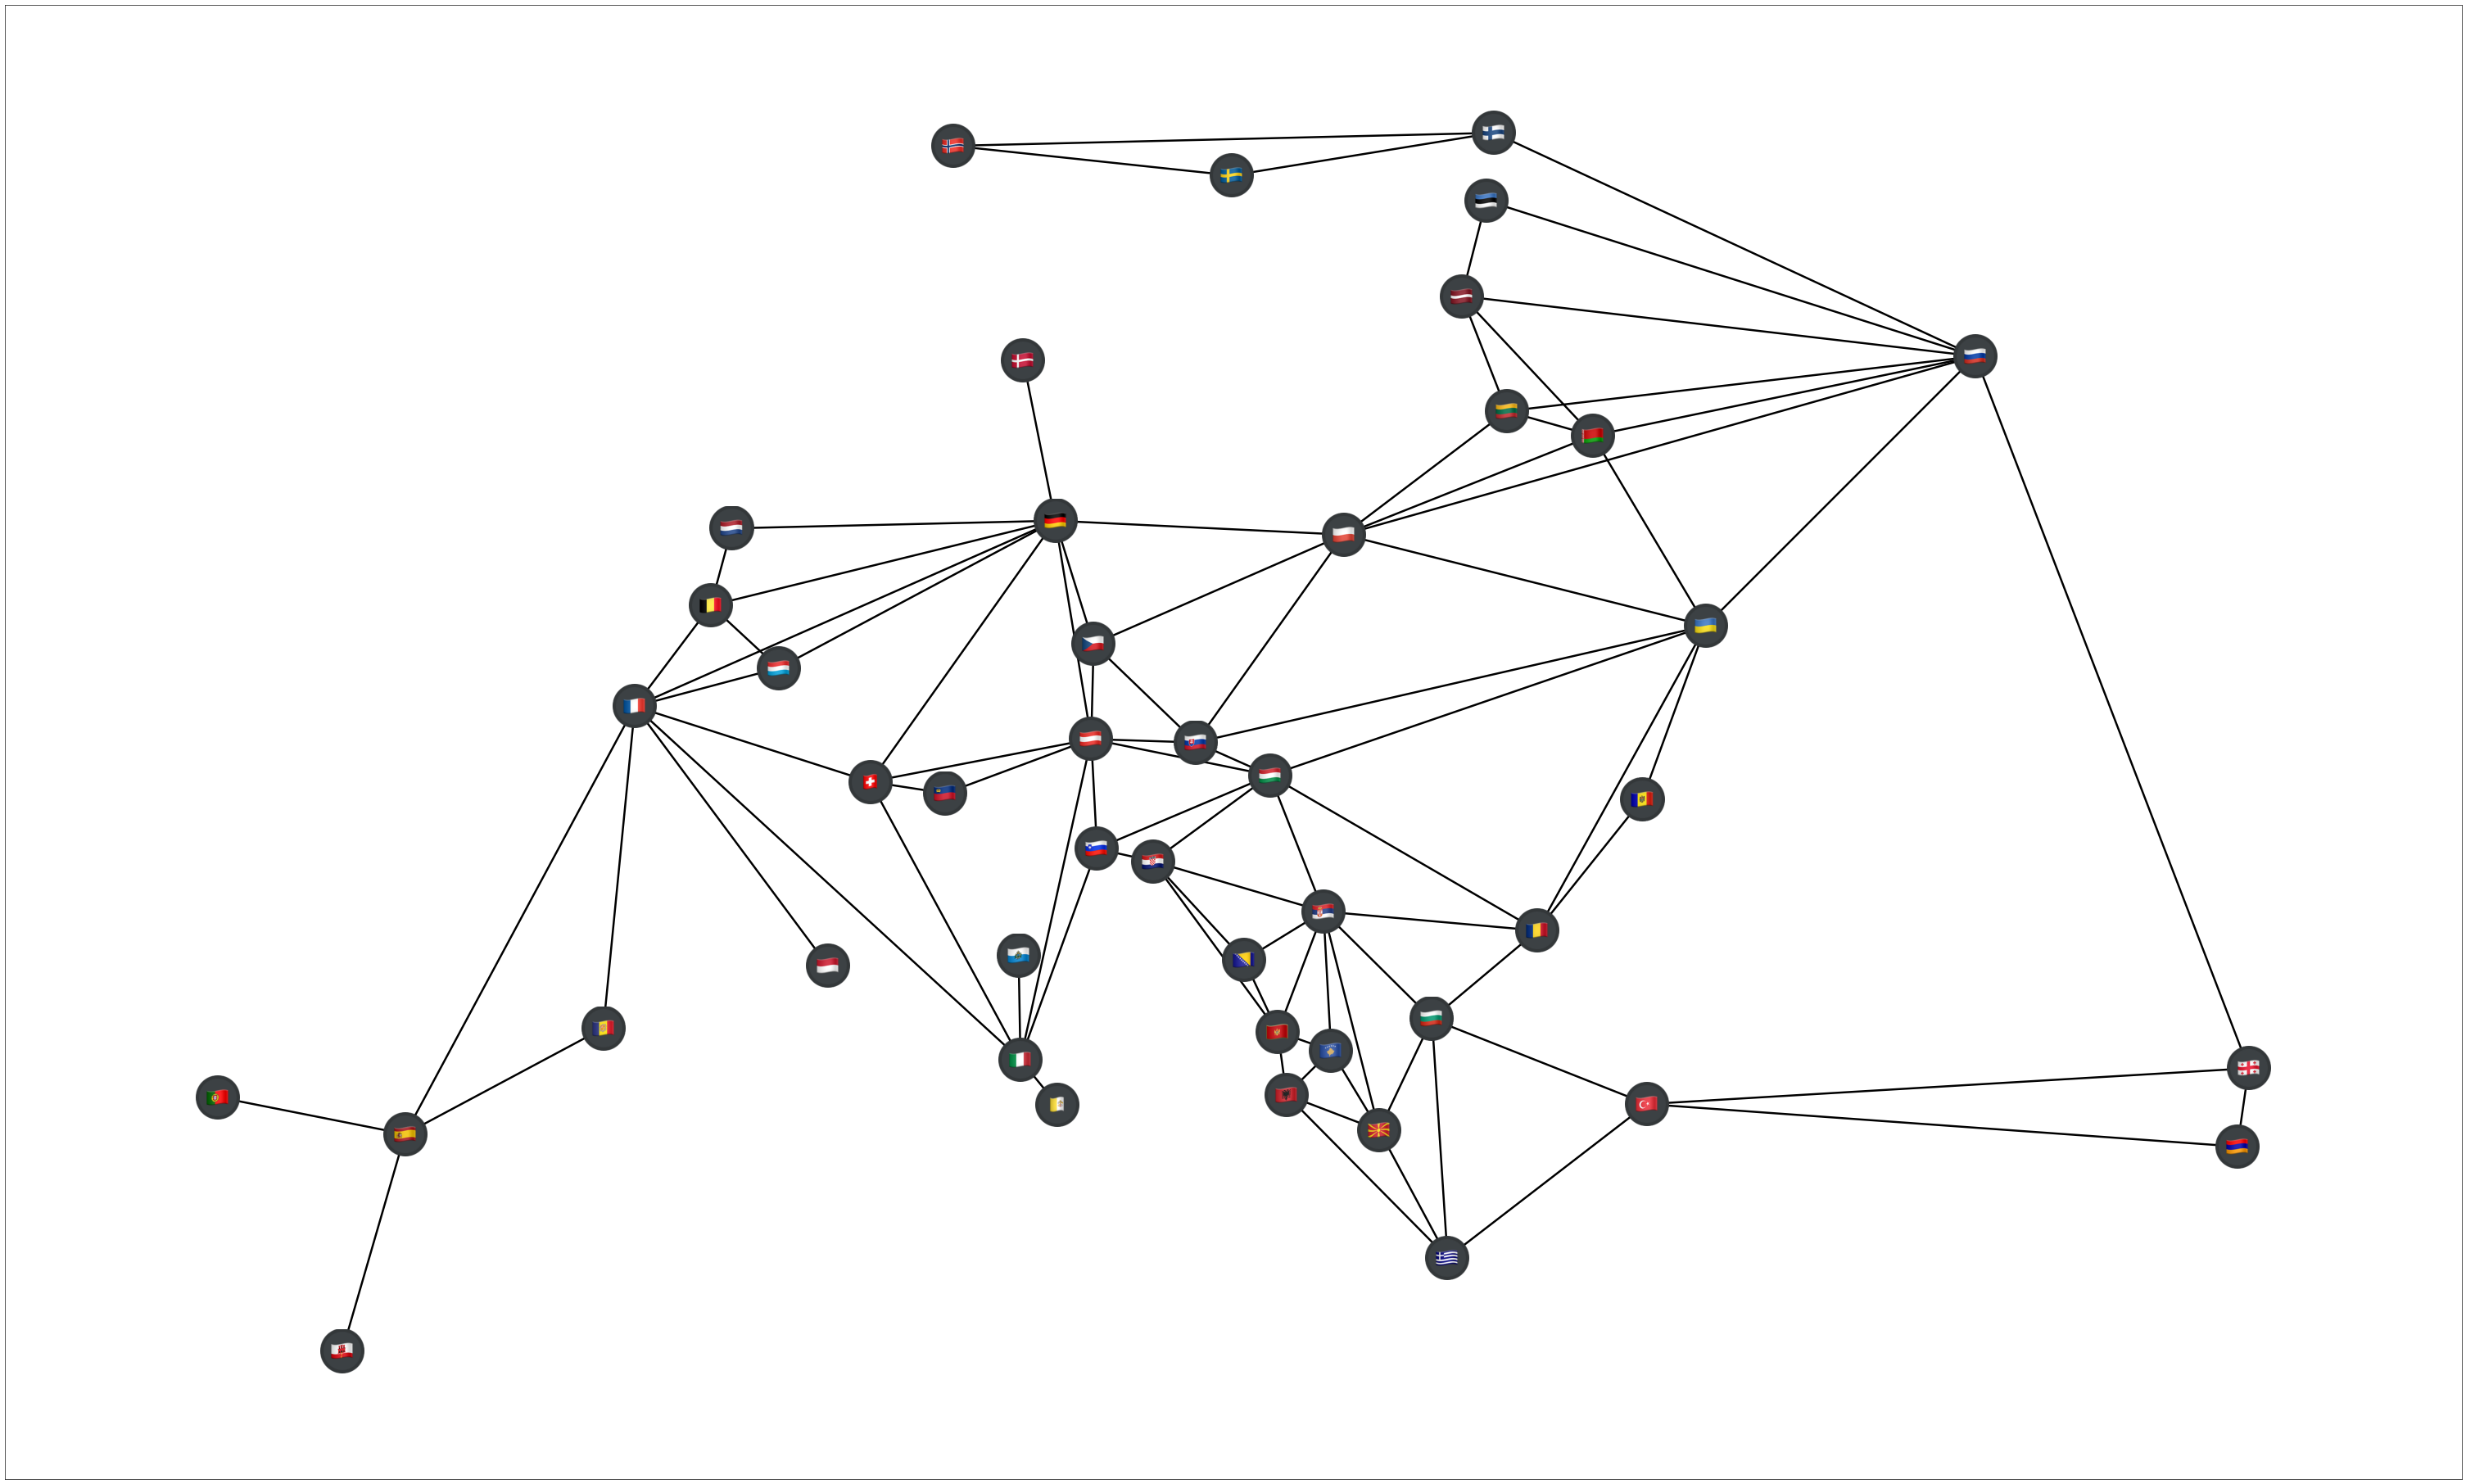

In [14]:
# A lot from here: https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html
def drawg(g: nx.Graph):
    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=3)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))

        # злом на увеличение РОССИИ 🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺🇷🇺
        # a = None
        # if (n == "Россия"):
        #     ricon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.15
        #     ricon_center = ricon_size / 2.0
        #     rxf, ryf = tr_figure(pos[n])
        #     rxa, rya = tr_axes((rxf, ryf))
        #     a = plt.axes([rxa - ricon_center, rya - ricon_center, ricon_size, ricon_size])
        # else:
        #     a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])

        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
drawg(g)

### A - Drawing the graph of Europe
Image is in the pdf or on a USB in the Hauge

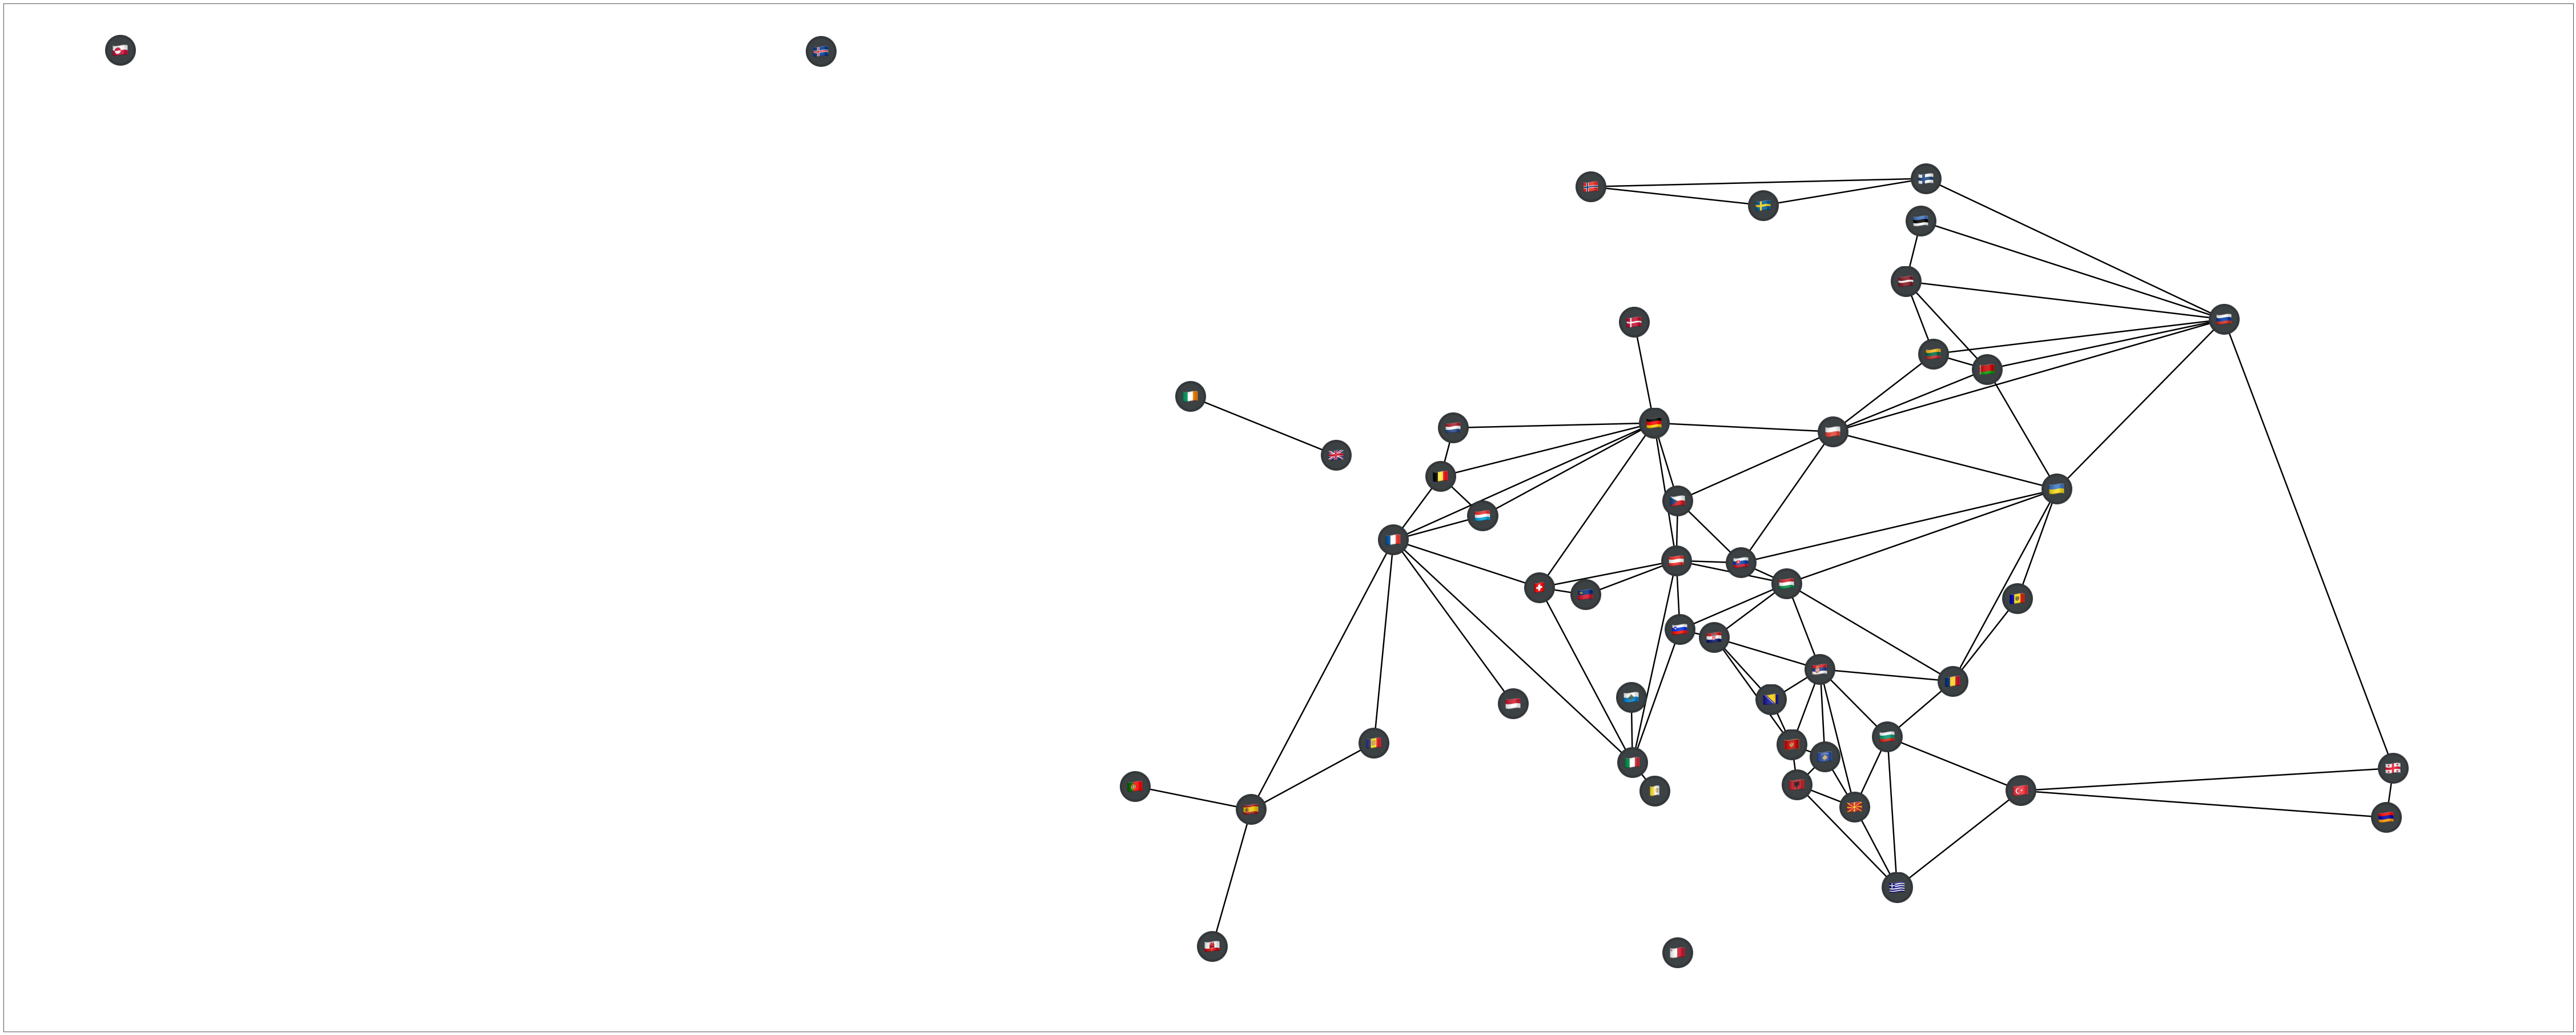

In [15]:
def draweu(g: nx.Graph):
    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon*1.5, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=3)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))

        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
draweu(eu)

### B - Finding everything except my dad

In [16]:
print(f"|V| = {nx.number_of_nodes(g)}")
print(f"|E| = {nx.number_of_edges(g)}")

g_mindeg = 1
g_maxdeg = 0
for _, deg in g.degree():
    if (deg == 0) : continue
    g_mindeg = min(g_mindeg, deg)
    g_maxdeg = max(g_maxdeg, deg)
print(f"δ(G) = {g_mindeg}")
print(f"Δ(G) = {g_maxdeg}")

print(f"rad(G) = {nx.radius(g)}")
print(f"diam(G) = {nx.diameter(g)}")
g_girth = 1
for cycle in nx.cycle_basis(g):
    g_girth = min(len(cycle), g_girth)
print(f"girth(G) = {g_girth}")
g_centerstr = ", ".join(nx.center(g)) # Хочу чтобы человек, который придумал это синтаксис, выпил свои таблетки     
print(f"center(G) = {g_centerstr}")

print(f"ϰ(G) = {len(nx.minimum_node_cut(g))}")
print(f"λ(G) = {len(nx.minimum_edge_cut(g))}")


|V| = 45
|E| = 91
δ(G) = 1
Δ(G) = 9
rad(G) = 5
diam(G) = 8
girth(G) = 1
center(G) = Австрия, Беларусь, Хорватия, Чехия, Германия, Венгрия, Литва, Польша, Россия, Словакия, Словения, Швейцария, Украина
ϰ(G) = 1
λ(G) = 1


### C - Minimum Vertex Coloring

In [17]:
def printColoring(graph: nx.Graph):
    g_coloring = nx.greedy_color(graph, strategy="smallest_last")
    g_coloringDict = {}
    for key in g_coloring.keys():
        color = g_coloring[key]
        if g_coloringDict.get(color) == None:
            g_coloringDict[color] = [key]
        else:
            g_coloringDict[color].append(key)
    for key in g_coloringDict.keys():
        colorCountriesStr = ", ".join(g_coloringDict[key])
        print(f"{key} = {colorCountriesStr}")
printColoring(g)

0 = Словакия, Германия, Россия, Словения, Румыния, Черногория, Македония, Турция, Швеция, Испания, Лихтенштейн, Ватикан, Сан Марино, Монако
1 = Чехия, Украина, Италия, Литва, Сербия, Люксембург, Албания, Грузия, Нидерланды, Финляндия, Андорра, Эстония, Португалия, Гибралтар, Дания
2 = Австрия, Польша, Хорватия, Франция, Латвия, Болгария, Косово, Молдова, Армения, Норвегия
3 = Венгрия, Беларусь, Швейцария, Босния, Бельгия, Греция


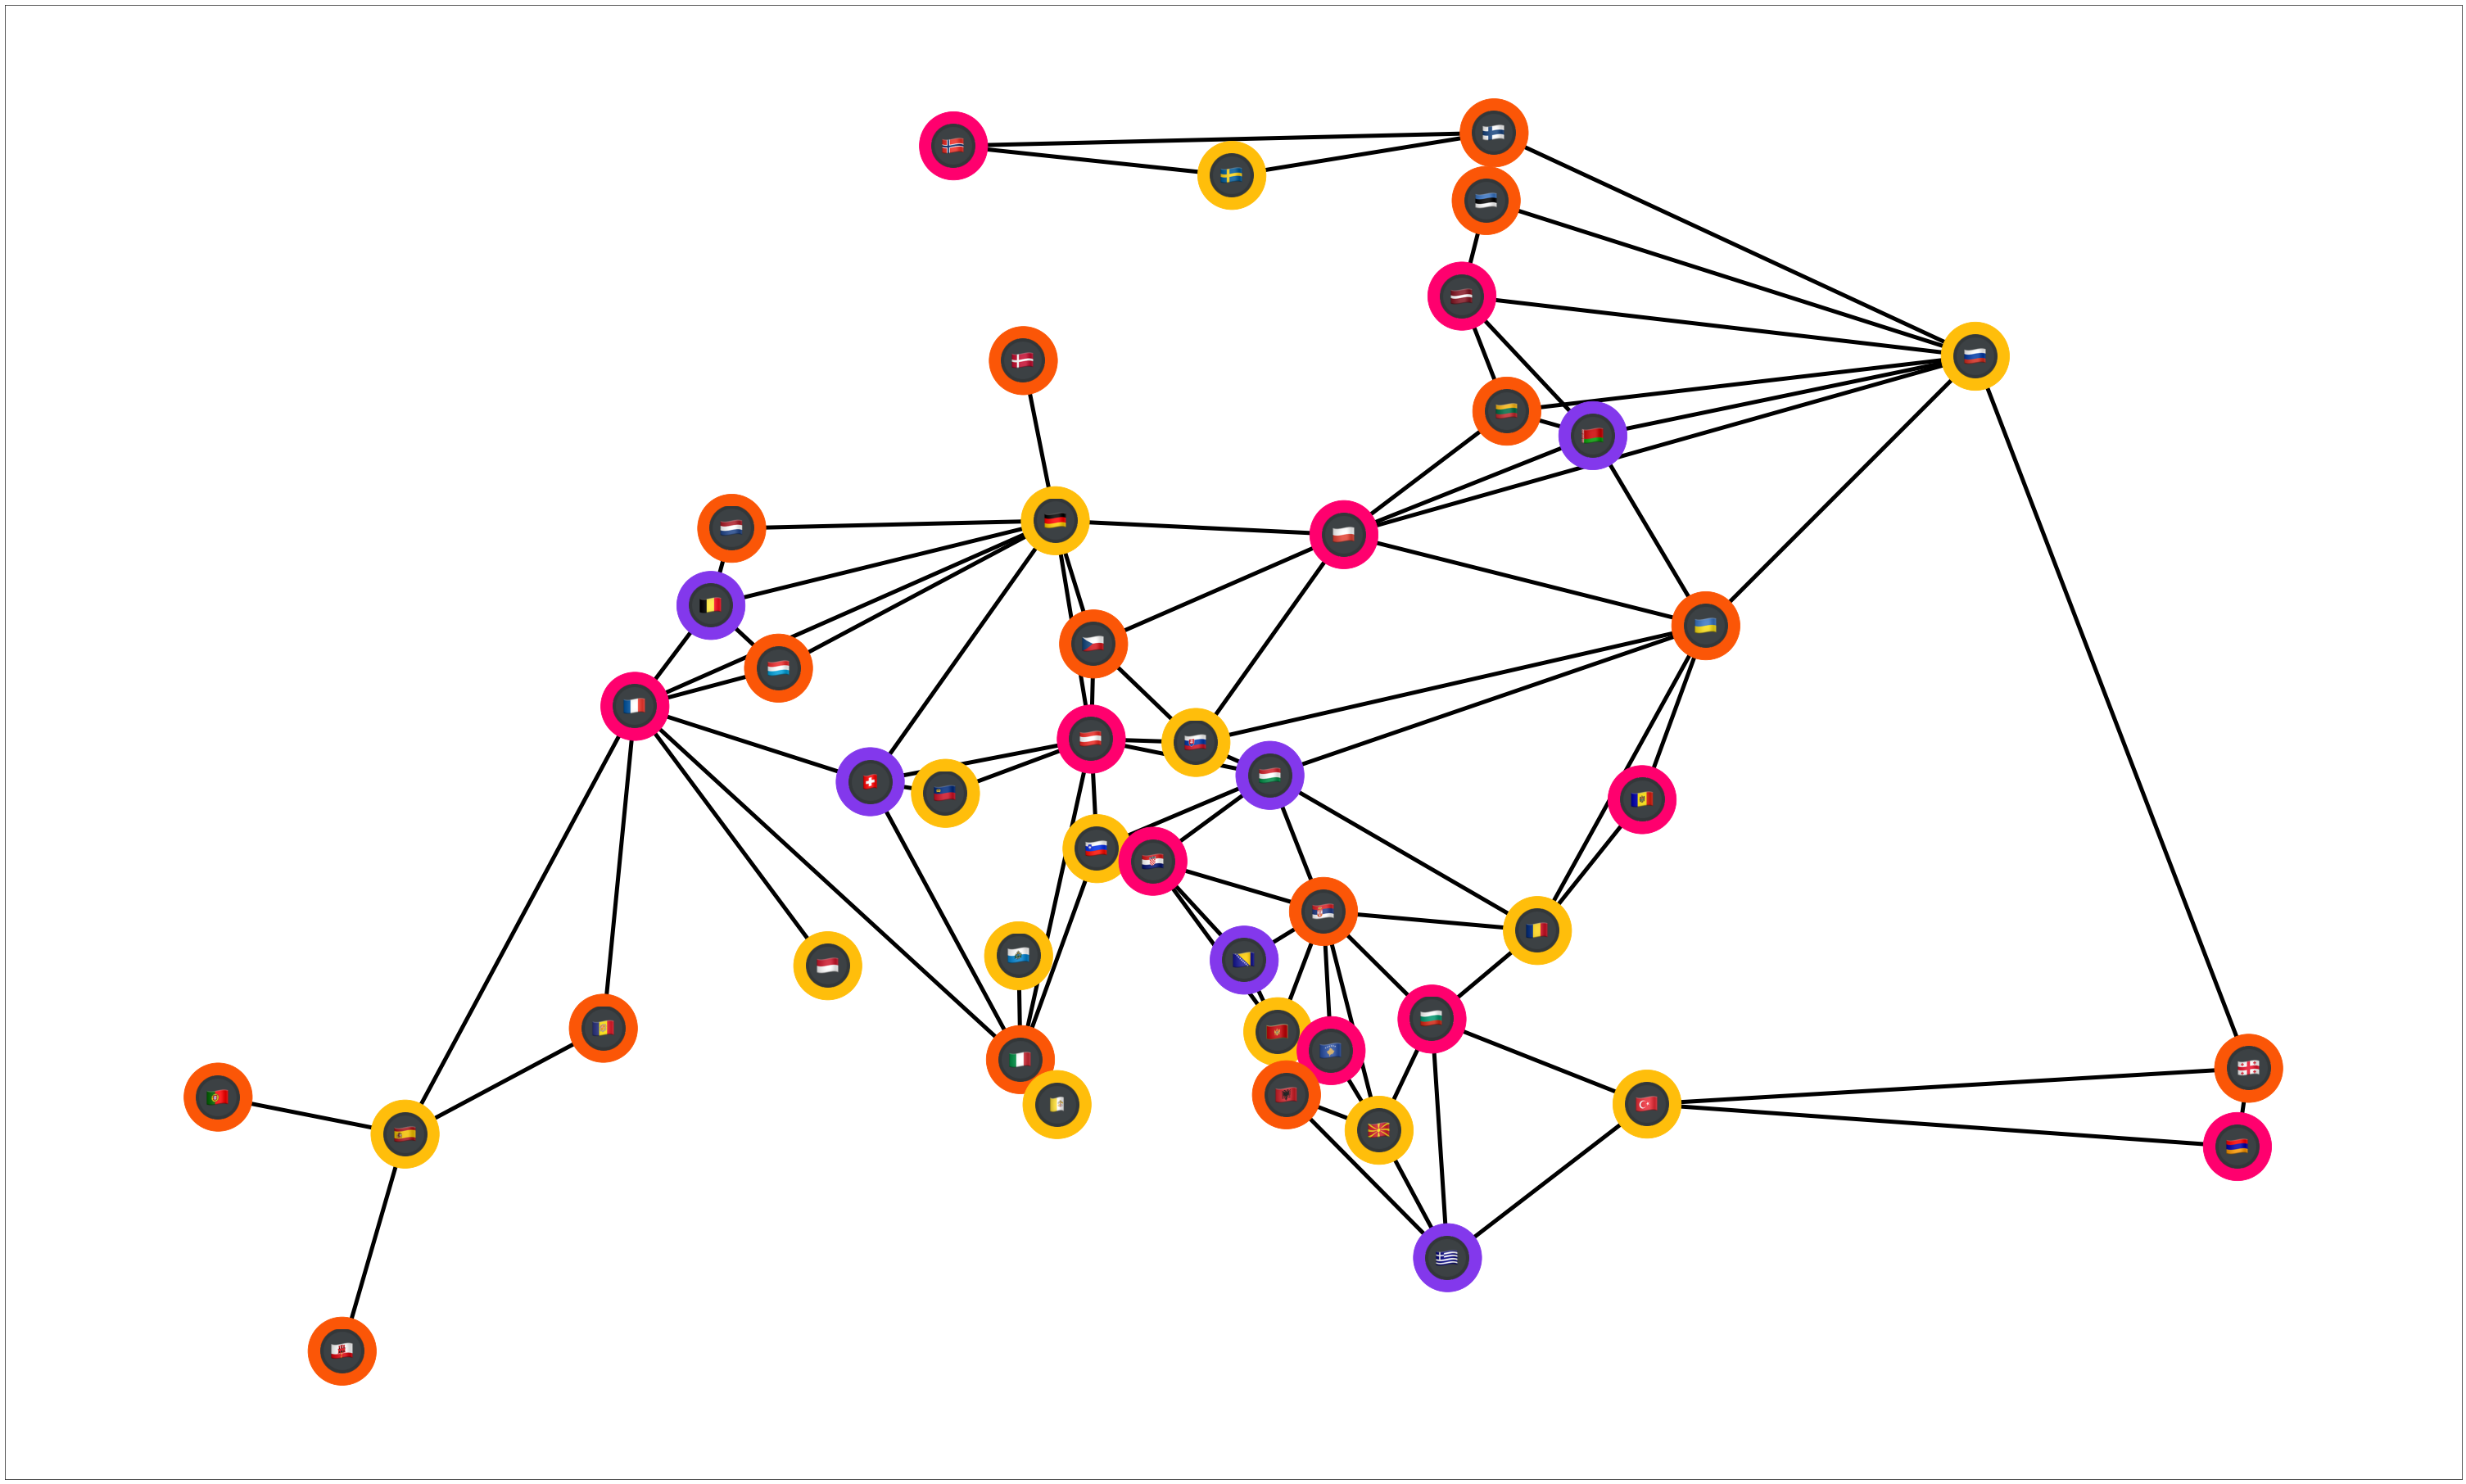

In [18]:
def renderVertexColoring(g: nx.Graph):
    global palette_colorful
    palette = palette_colorful
    # Colors
    node_cmap = []
    nodelist = []
    g_vcoloring = nx.greedy_color(g, strategy="smallest_last")
    for e in g_vcoloring:
        nodelist.append(e)
        node_cmap.append(palette[g_vcoloring[e]])
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = 10000, with_labels=False, width=6, nodelist=nodelist, node_color=node_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderVertexColoring(g)

### D - Minimum Edge Coloring

In [19]:
def printEdgeColoring(graph: nx.Graph):
    g_coloring = nx.greedy_color(graph)
    g_coloringDict = {}
    for key in g_coloring.keys():
        color = g_coloring[key]
        if g_coloringDict.get(color) == None:
            g_coloringDict[color] = [key]
        else:
            g_coloringDict[color].append(key)
    for key in g_coloringDict.keys():
        colorCountriesStr = ""
        for edge in g_coloringDict[key]:
            colorCountriesStr += f"({edge[0]} <-> {edge[1]}), "
        print(f"{key} = {colorCountriesStr}")
printEdgeColoring(nx.line_graph(g))

0 = (Австрия <-> Германия), (Польша <-> Россия), (Венгрия <-> Сербия), (Италия <-> Франция), (Словакия <-> Украина), (Болгария <-> Македония), (Хорватия <-> Черногория), (Беларусь <-> Латвия), (Греция <-> Турция), (Албания <-> Косово), (Лихтенштейн <-> Швейцария), (Молдова <-> Румыния), (Бельгия <-> Люксембург), (Андорра <-> Испания), (Финляндия <-> Швеция), (Армения <-> Грузия), 
1 = (Германия <-> Франция), (Россия <-> Украина), (Австрия <-> Венгрия), (Болгария <-> Сербия), (Польша <-> Словакия), (Италия <-> Швейцария), (Греция <-> Македония), (Беларусь <-> Литва), (Косово <-> Черногория), (Словения <-> Хорватия), (Грузия <-> Турция), (Бельгия <-> Нидерланды), (Латвия <-> Эстония), (Испания <-> Португалия), (Норвегия <-> Финляндия), 
2 = (Германия <-> Польша), (Австрия <-> Италия), (Венгрия <-> Украина), (Беларусь <-> Россия), (Франция <-> Швейцария), (Румыния <-> Сербия), (Словакия <-> Чехия), (Косово <-> Македония), (Болгария <-> Греция), (Албания <-> Черногория), (Латвия <-> Литва)

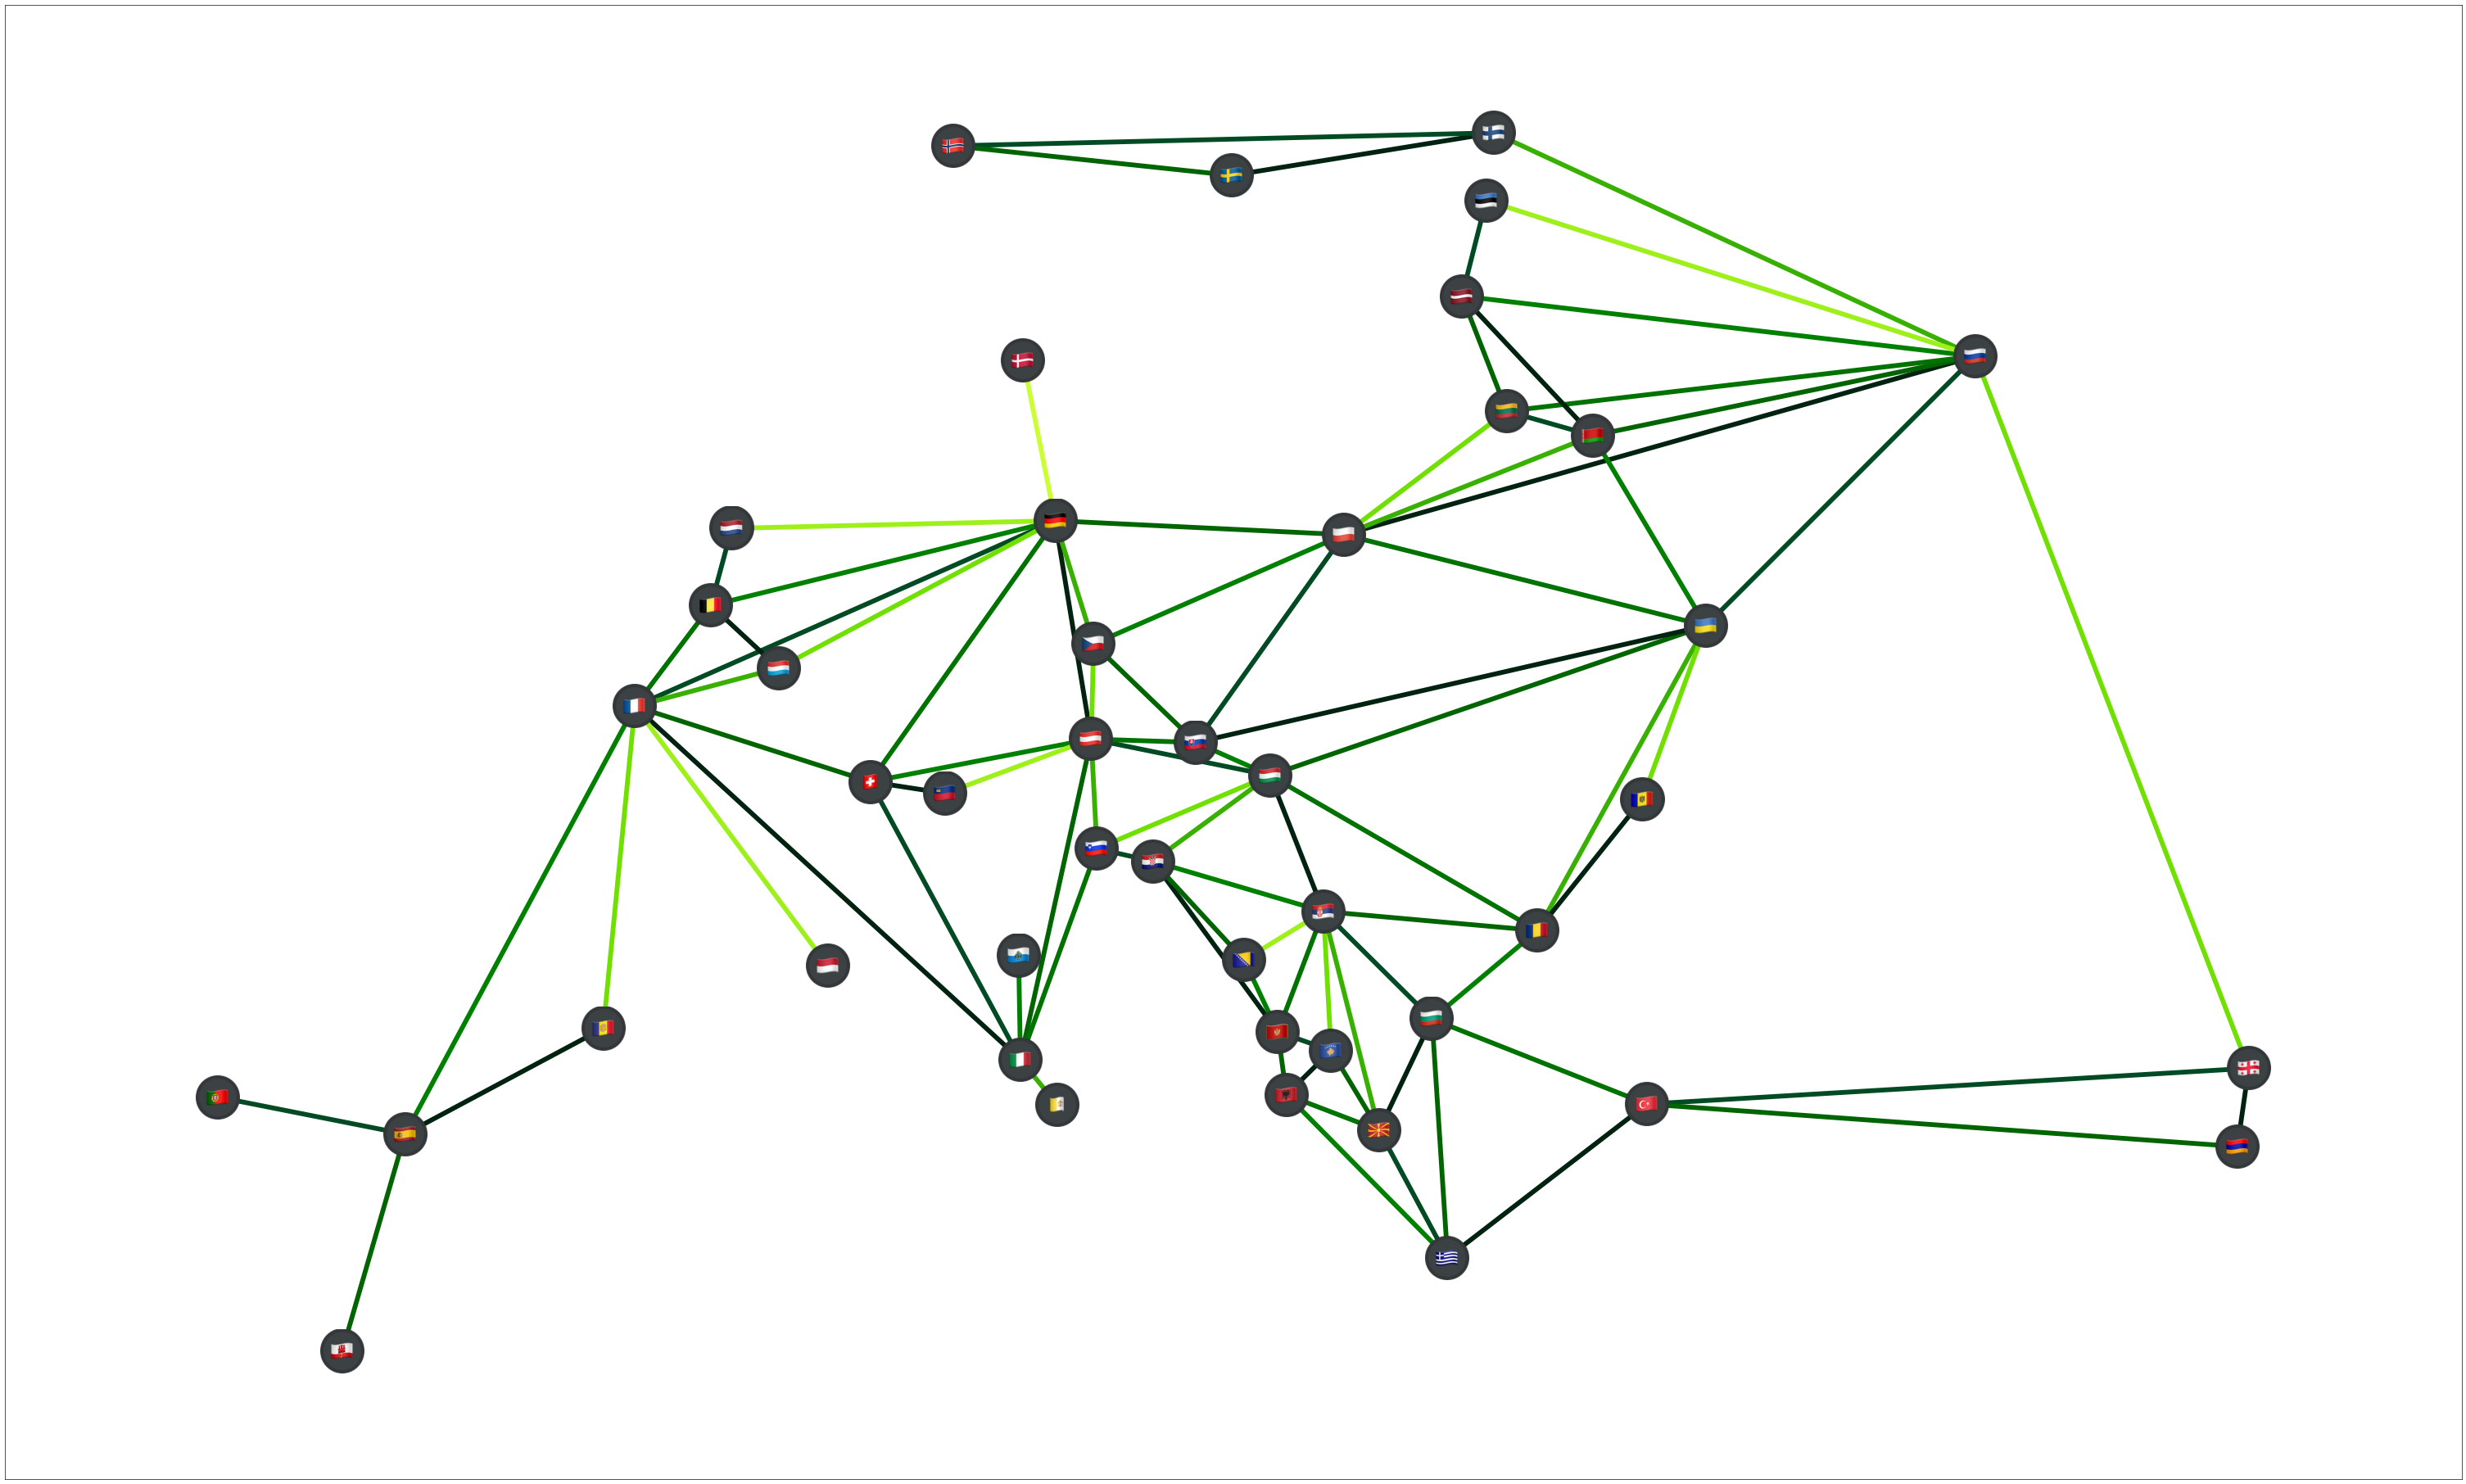

In [20]:
def renderEdgeColoring(g: nx.Graph):
    global palette_green
    palette = palette_green
    # Colors
    edge_cmap = []
    edgelist = []
    g_edgecoloring = nx.greedy_color(nx.line_graph(g))
    for e in g_edgecoloring:
        edgelist.append(e)
        edge_cmap.append(palette[g_edgecoloring[e]])
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=7, edgelist=edgelist, edge_color=edge_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderEdgeColoring(g)

### E - Maximum Clique

In [21]:
g_cliques = list(nx.find_cliques(g))
g_maxcliquesize = 0
g_maxclique = []
for clique in g_cliques:
    if g_maxcliquesize < len(clique):
        g_maxcliquesize = len(clique)
        g_maxclique = clique
g_maxcliquestr = ", ".join(g_maxclique)
print(f"Max Clique: {g_maxcliquestr}\nSize: {g_maxcliquesize}")

Max Clique: Германия, Бельгия, Франция, Люксембург
Size: 4


### F - Maximum Stable Set

In [22]:
g_maxstableset = nx.maximal_independent_set(g)
g_maxstablesetstr = ", ".join(g_maxstableset)
print(f"Maximum Stable Set: {g_maxstablesetstr}\nSize: {len(g_maxstableset)}")

Maximum Stable Set: Черногория, Грузия, Латвия, Лихтенштейн, Андорра, Сан Марино, Норвегия, Венгрия, Нидерланды, Молдова, Дания, Македония, Гибралтар, Чехия, Португалия, Ватикан, Монако, Люксембург
Size: 18


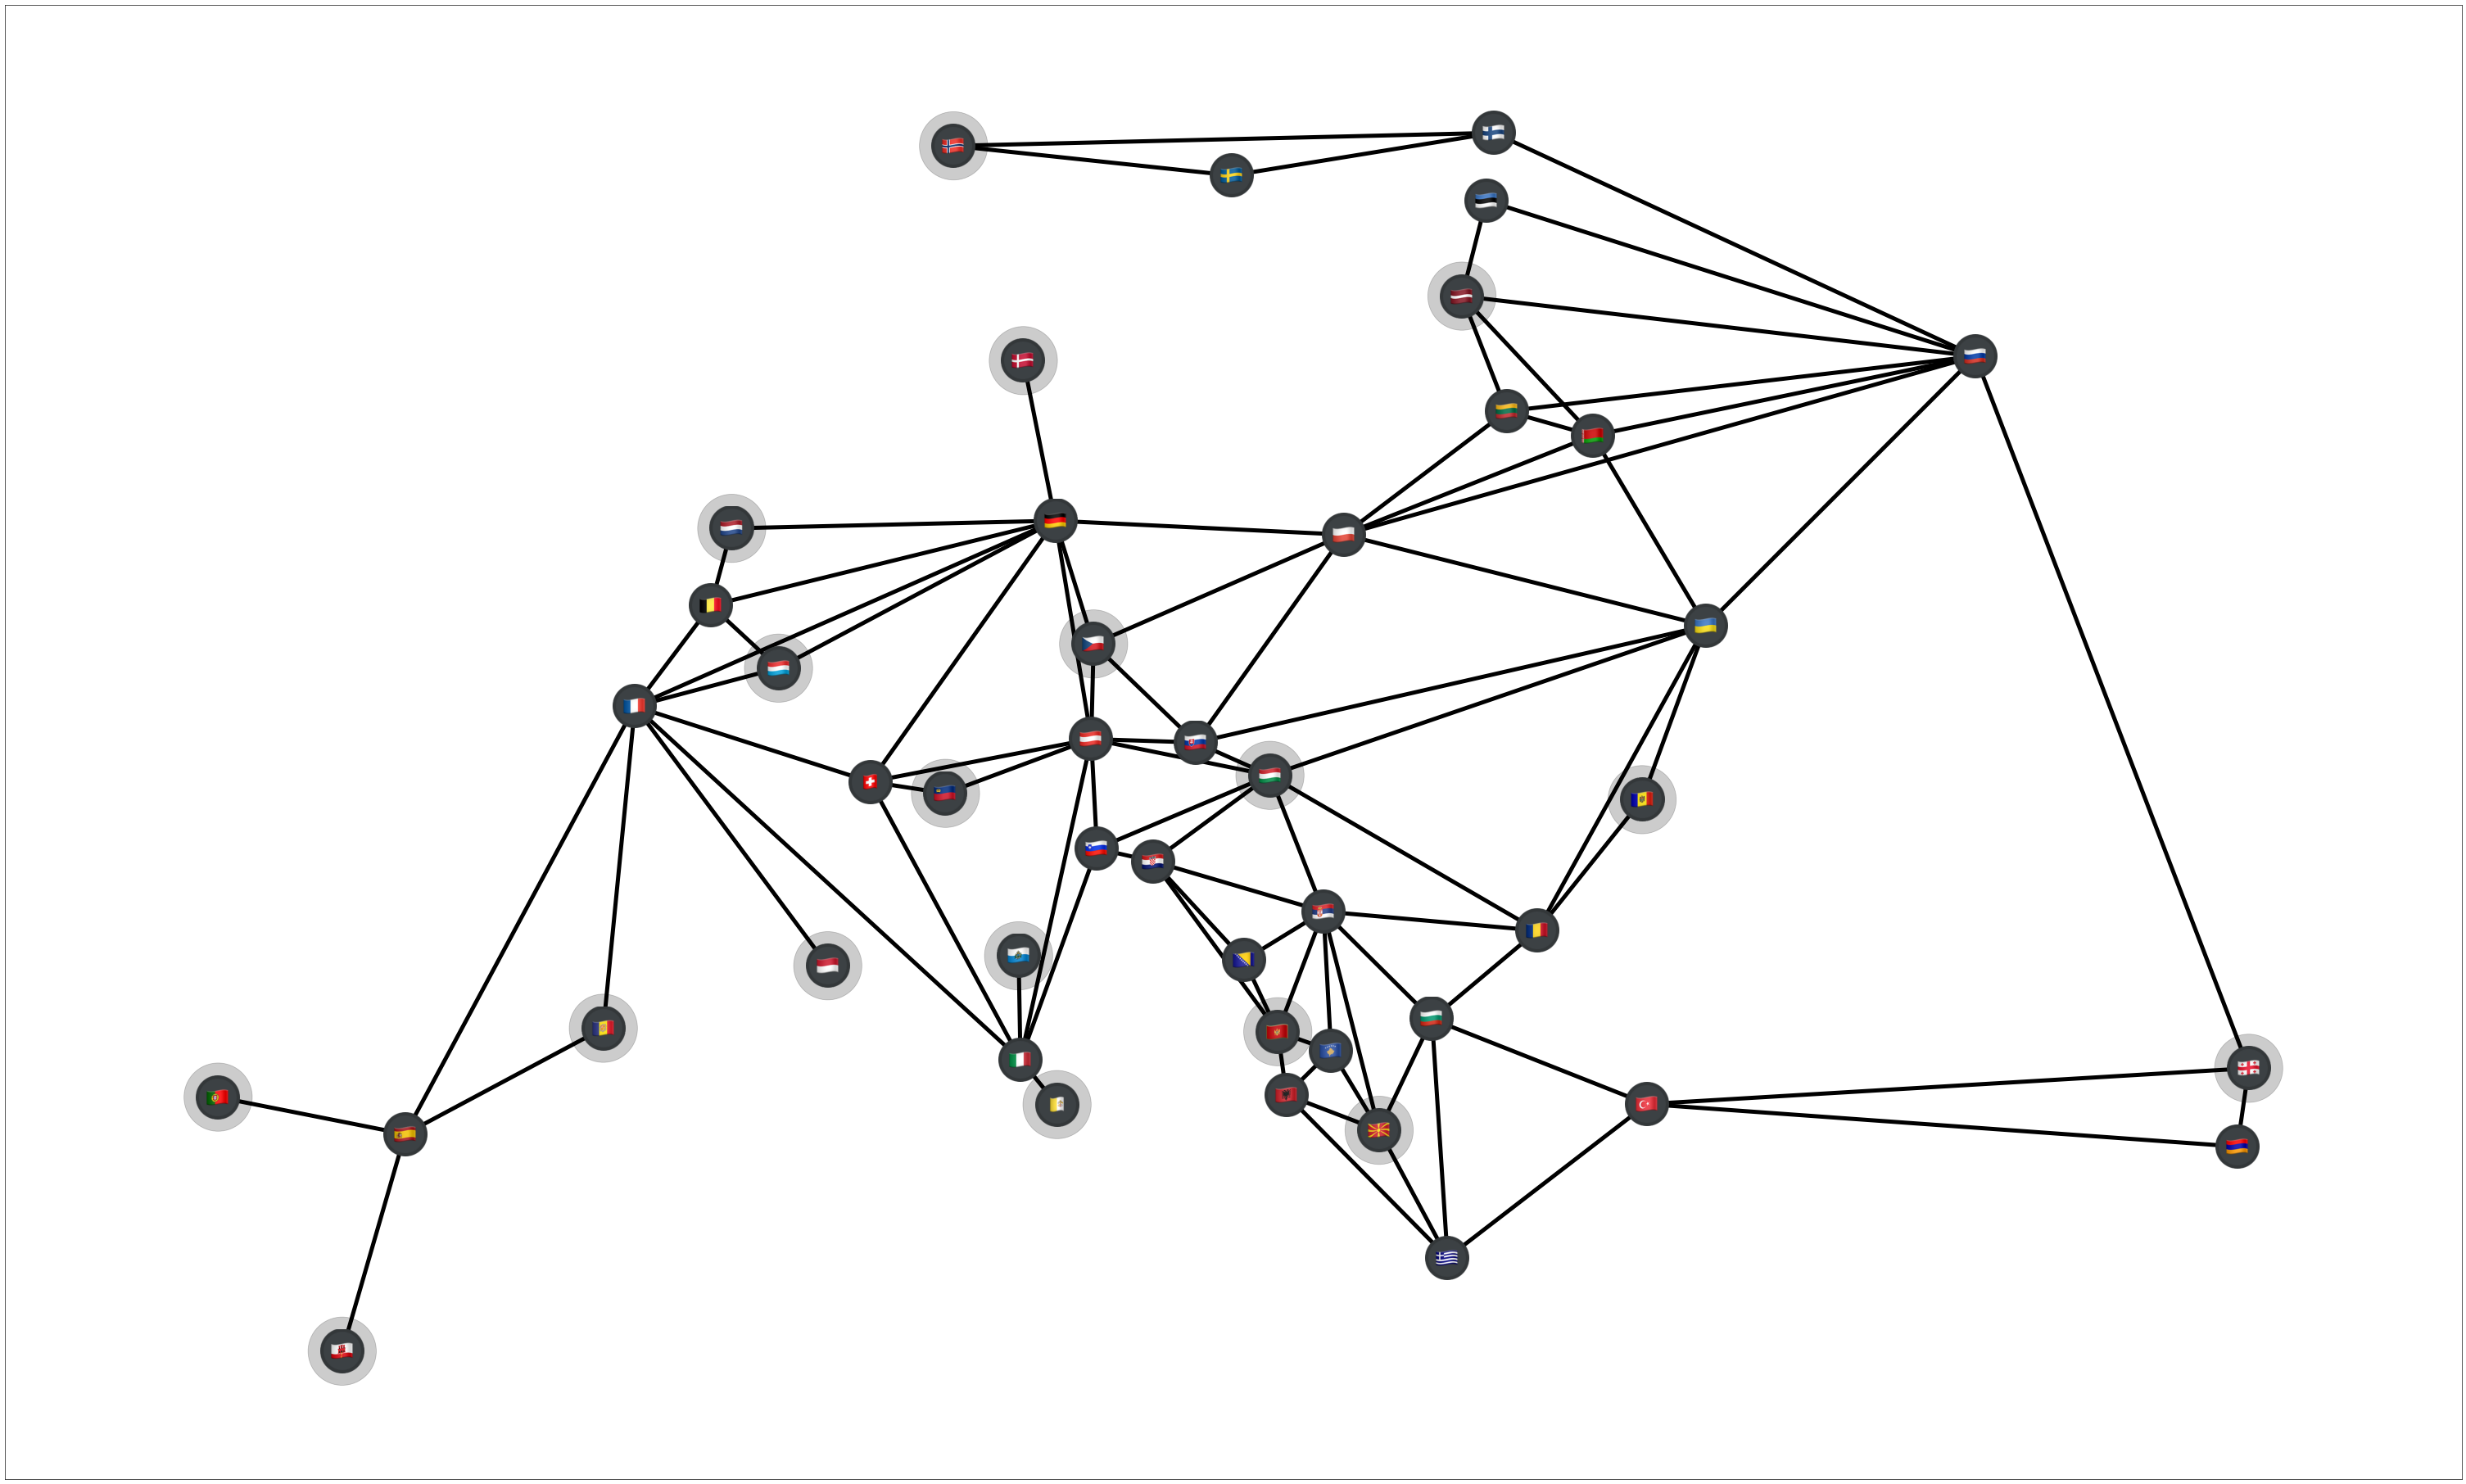

In [23]:
def renderMaxStableSet(g: nx.Graph):
    global g_maxstableset
    # Colors
    node_cmap = []
    nodelist = []
    for n in g.nodes:
        nodelist.append(n)
        if n in g_maxstableset:
            node_cmap.append((0,0,0,0.2))
        else:
            node_cmap.append((0,0,0,0))
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = 10000, with_labels=False, width=6, nodelist=nodelist, node_color=node_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderMaxStableSet(g)

### G - Maximum Matching

In [24]:
g_maxmatching = nx.maximal_matching(g)
g_maxmatchingstr = ""
for e in g_maxmatching:
    g_maxmatchingstr += f"({e[0]} <-> {e[1]}), "
print(f"Maximum matching: {g_maxmatchingstr}\nSize: {len(g_maxmatching)}")

Maximum matching: (Косово <-> Сербия), (Венгрия <-> Словения), (Андорра <-> Испания), (Босния <-> Хорватия), (Чехия <-> Германия), (Италия <-> Сан Марино), (Молдова <-> Украина), (Норвегия <-> Швеция), (Финляндия <-> Россия), (Польша <-> Словакия), (Болгария <-> Румыния), (Эстония <-> Латвия), (Бельгия <-> Нидерланды), (Армения <-> Турция), (Франция <-> Люксембург), (Албания <-> Македония), (Австрия <-> Швейцария), (Беларусь <-> Литва), 
Size: 18


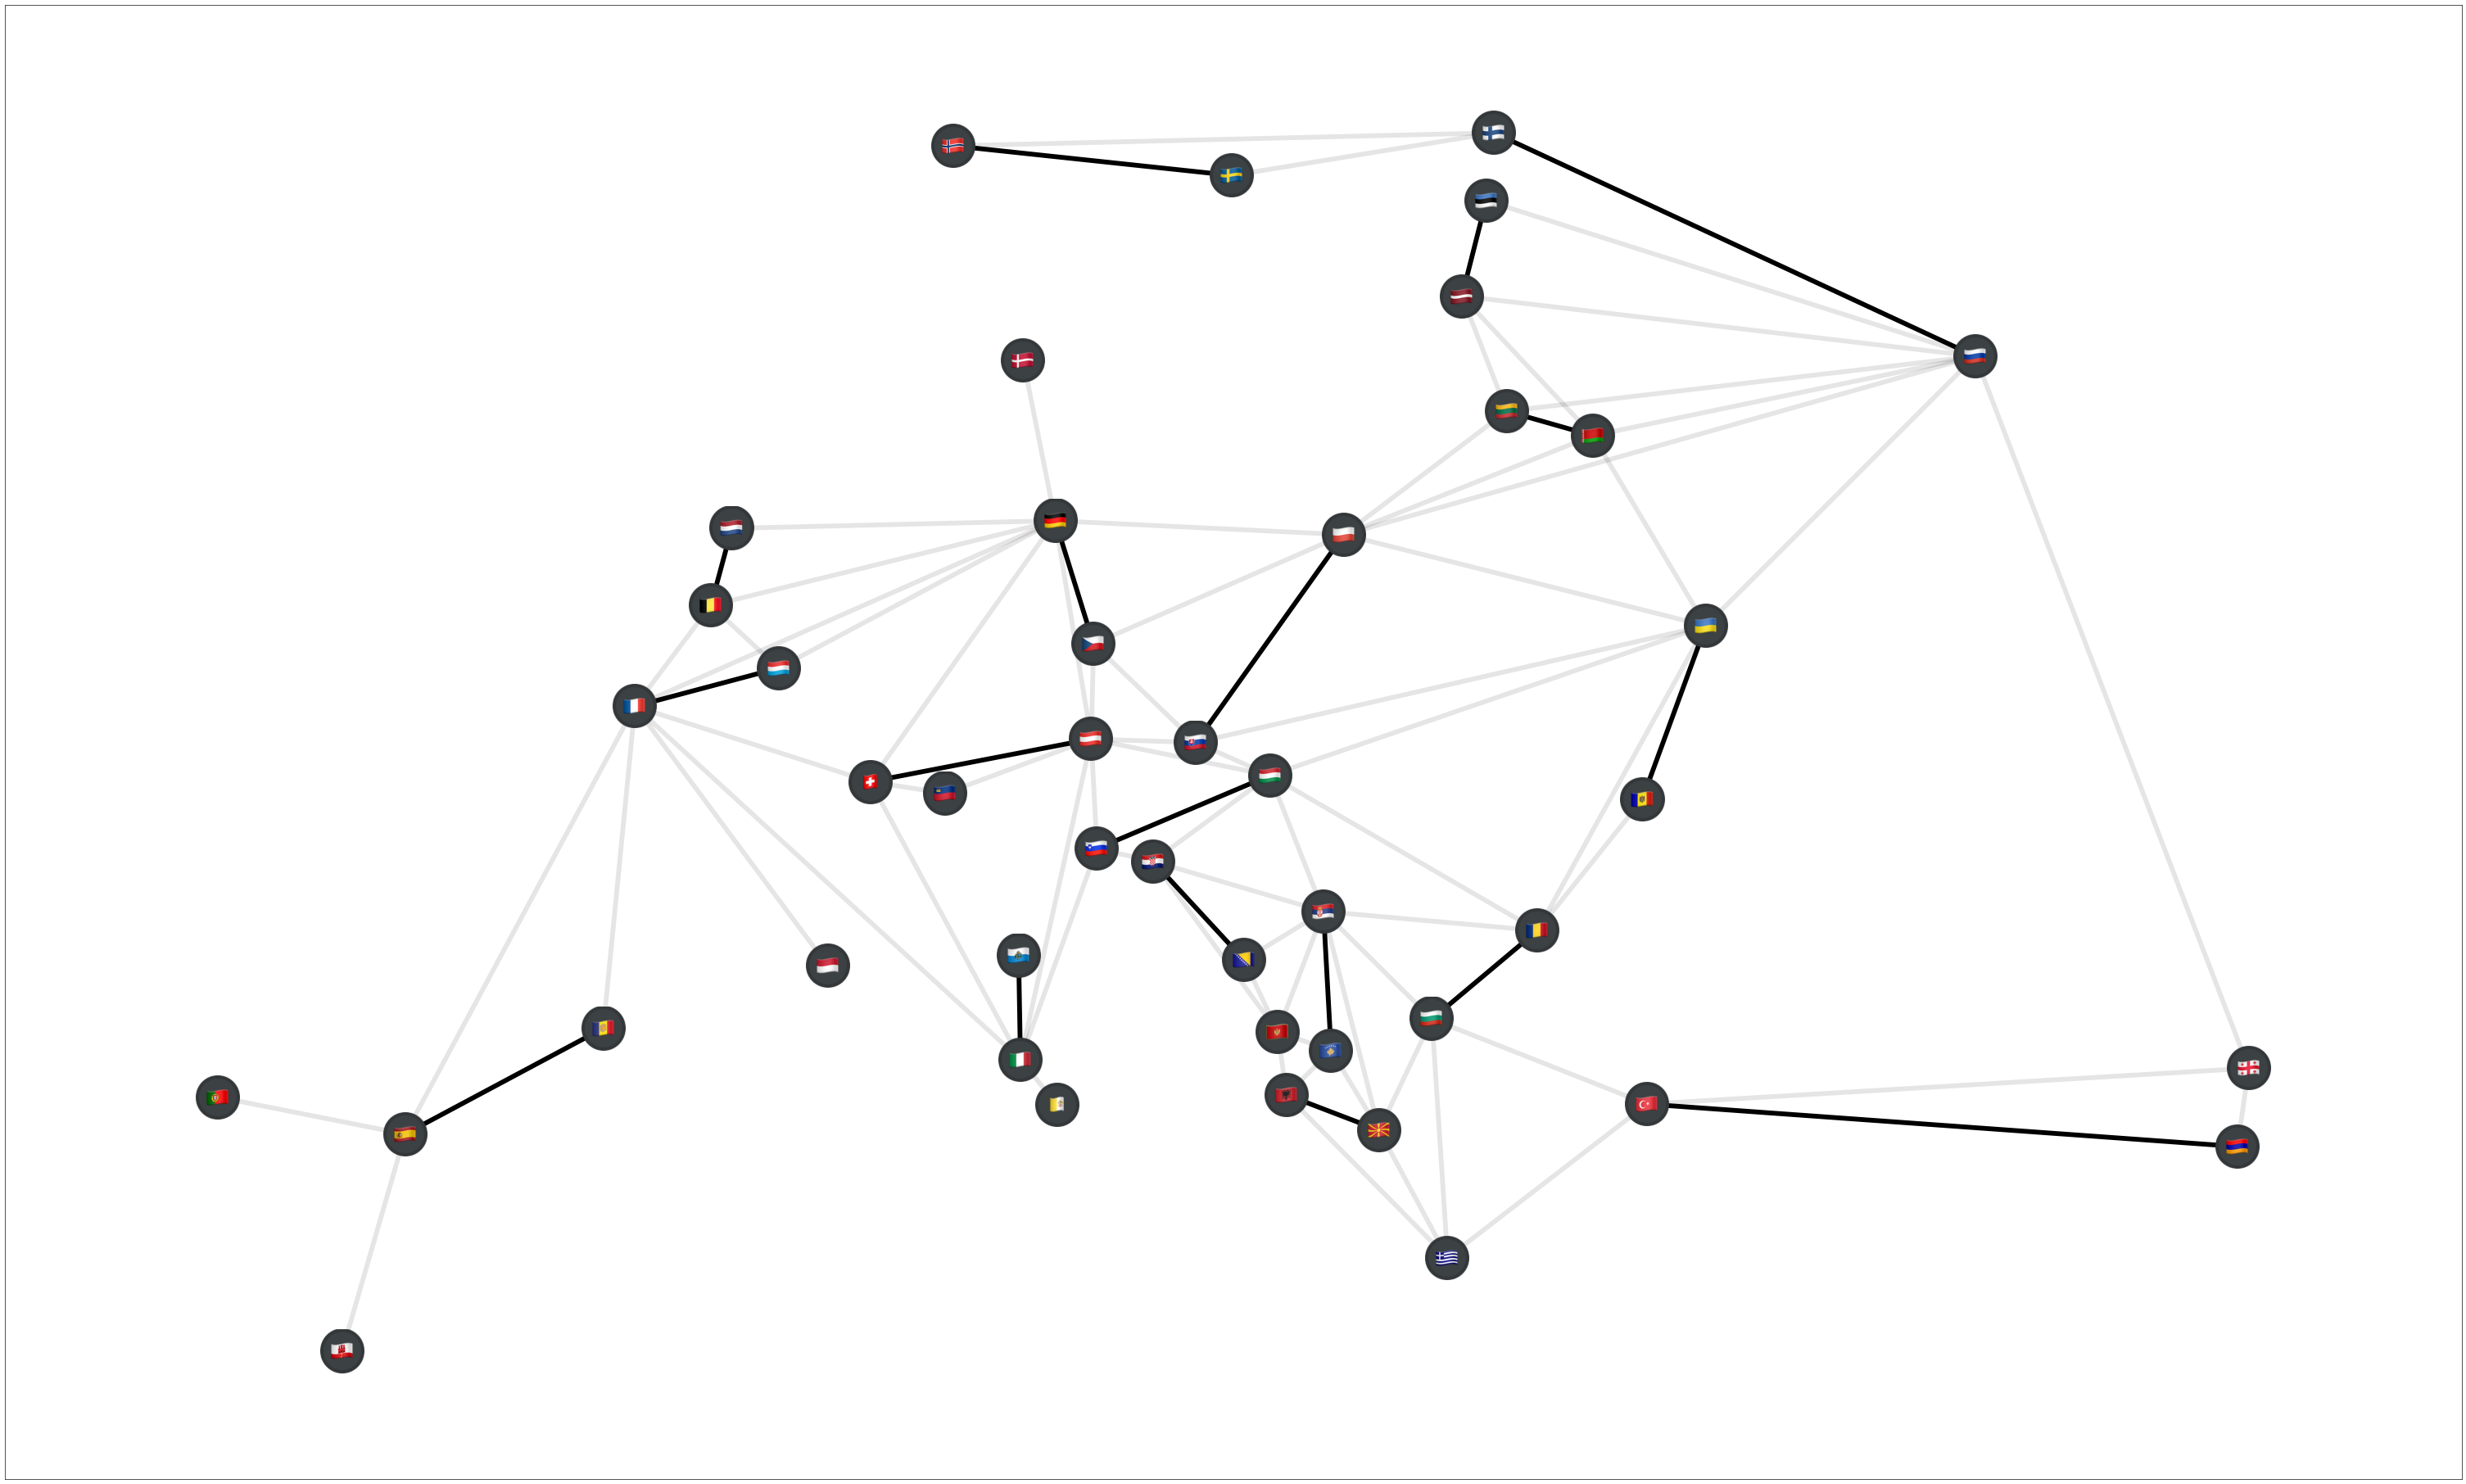

In [25]:
def renderMaxMatching(g: nx.Graph):
    global g_maxmatching
    # Colors
    edge_cmap = []
    edgelist = []
    for e in g.edges:
        edgelist.append(e)
        if (e in g_maxmatching) or ((e[1], e[0]) in g_maxmatching):
            edge_cmap.append((0,0,0,1))
        else:
            edge_cmap.append((0,0,0,0.1))
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=7, edgelist=edgelist, edge_color=edge_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderMaxMatching(g)

### H - Minimum Vertex Cover

In [26]:
g_minvertexcover = nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover(g)

g_minvertexcoverstr = ", ".join(g_minvertexcover)
print(f"Minimum Vertex Cover: {g_minvertexcoverstr}\nSize: {len(g_minvertexcover)}")

Minimum Vertex Cover: Германия, Италия, Польша, Чехия, Россия, Болгария, Албания, Сербия, Андорра, Украина, Турция, Литва, Румыния, Швейцария, Венгрия, Латвия, Беларусь, Хорватия, Армения, Босния, Косово, Словения, Франция, Эстония, Австрия, Финляндия, Норвегия, Бельгия, Люксембург, Нидерланды, Македония, Сан Марино, Испания, Молдова, Словакия, Швеция
Size: 36


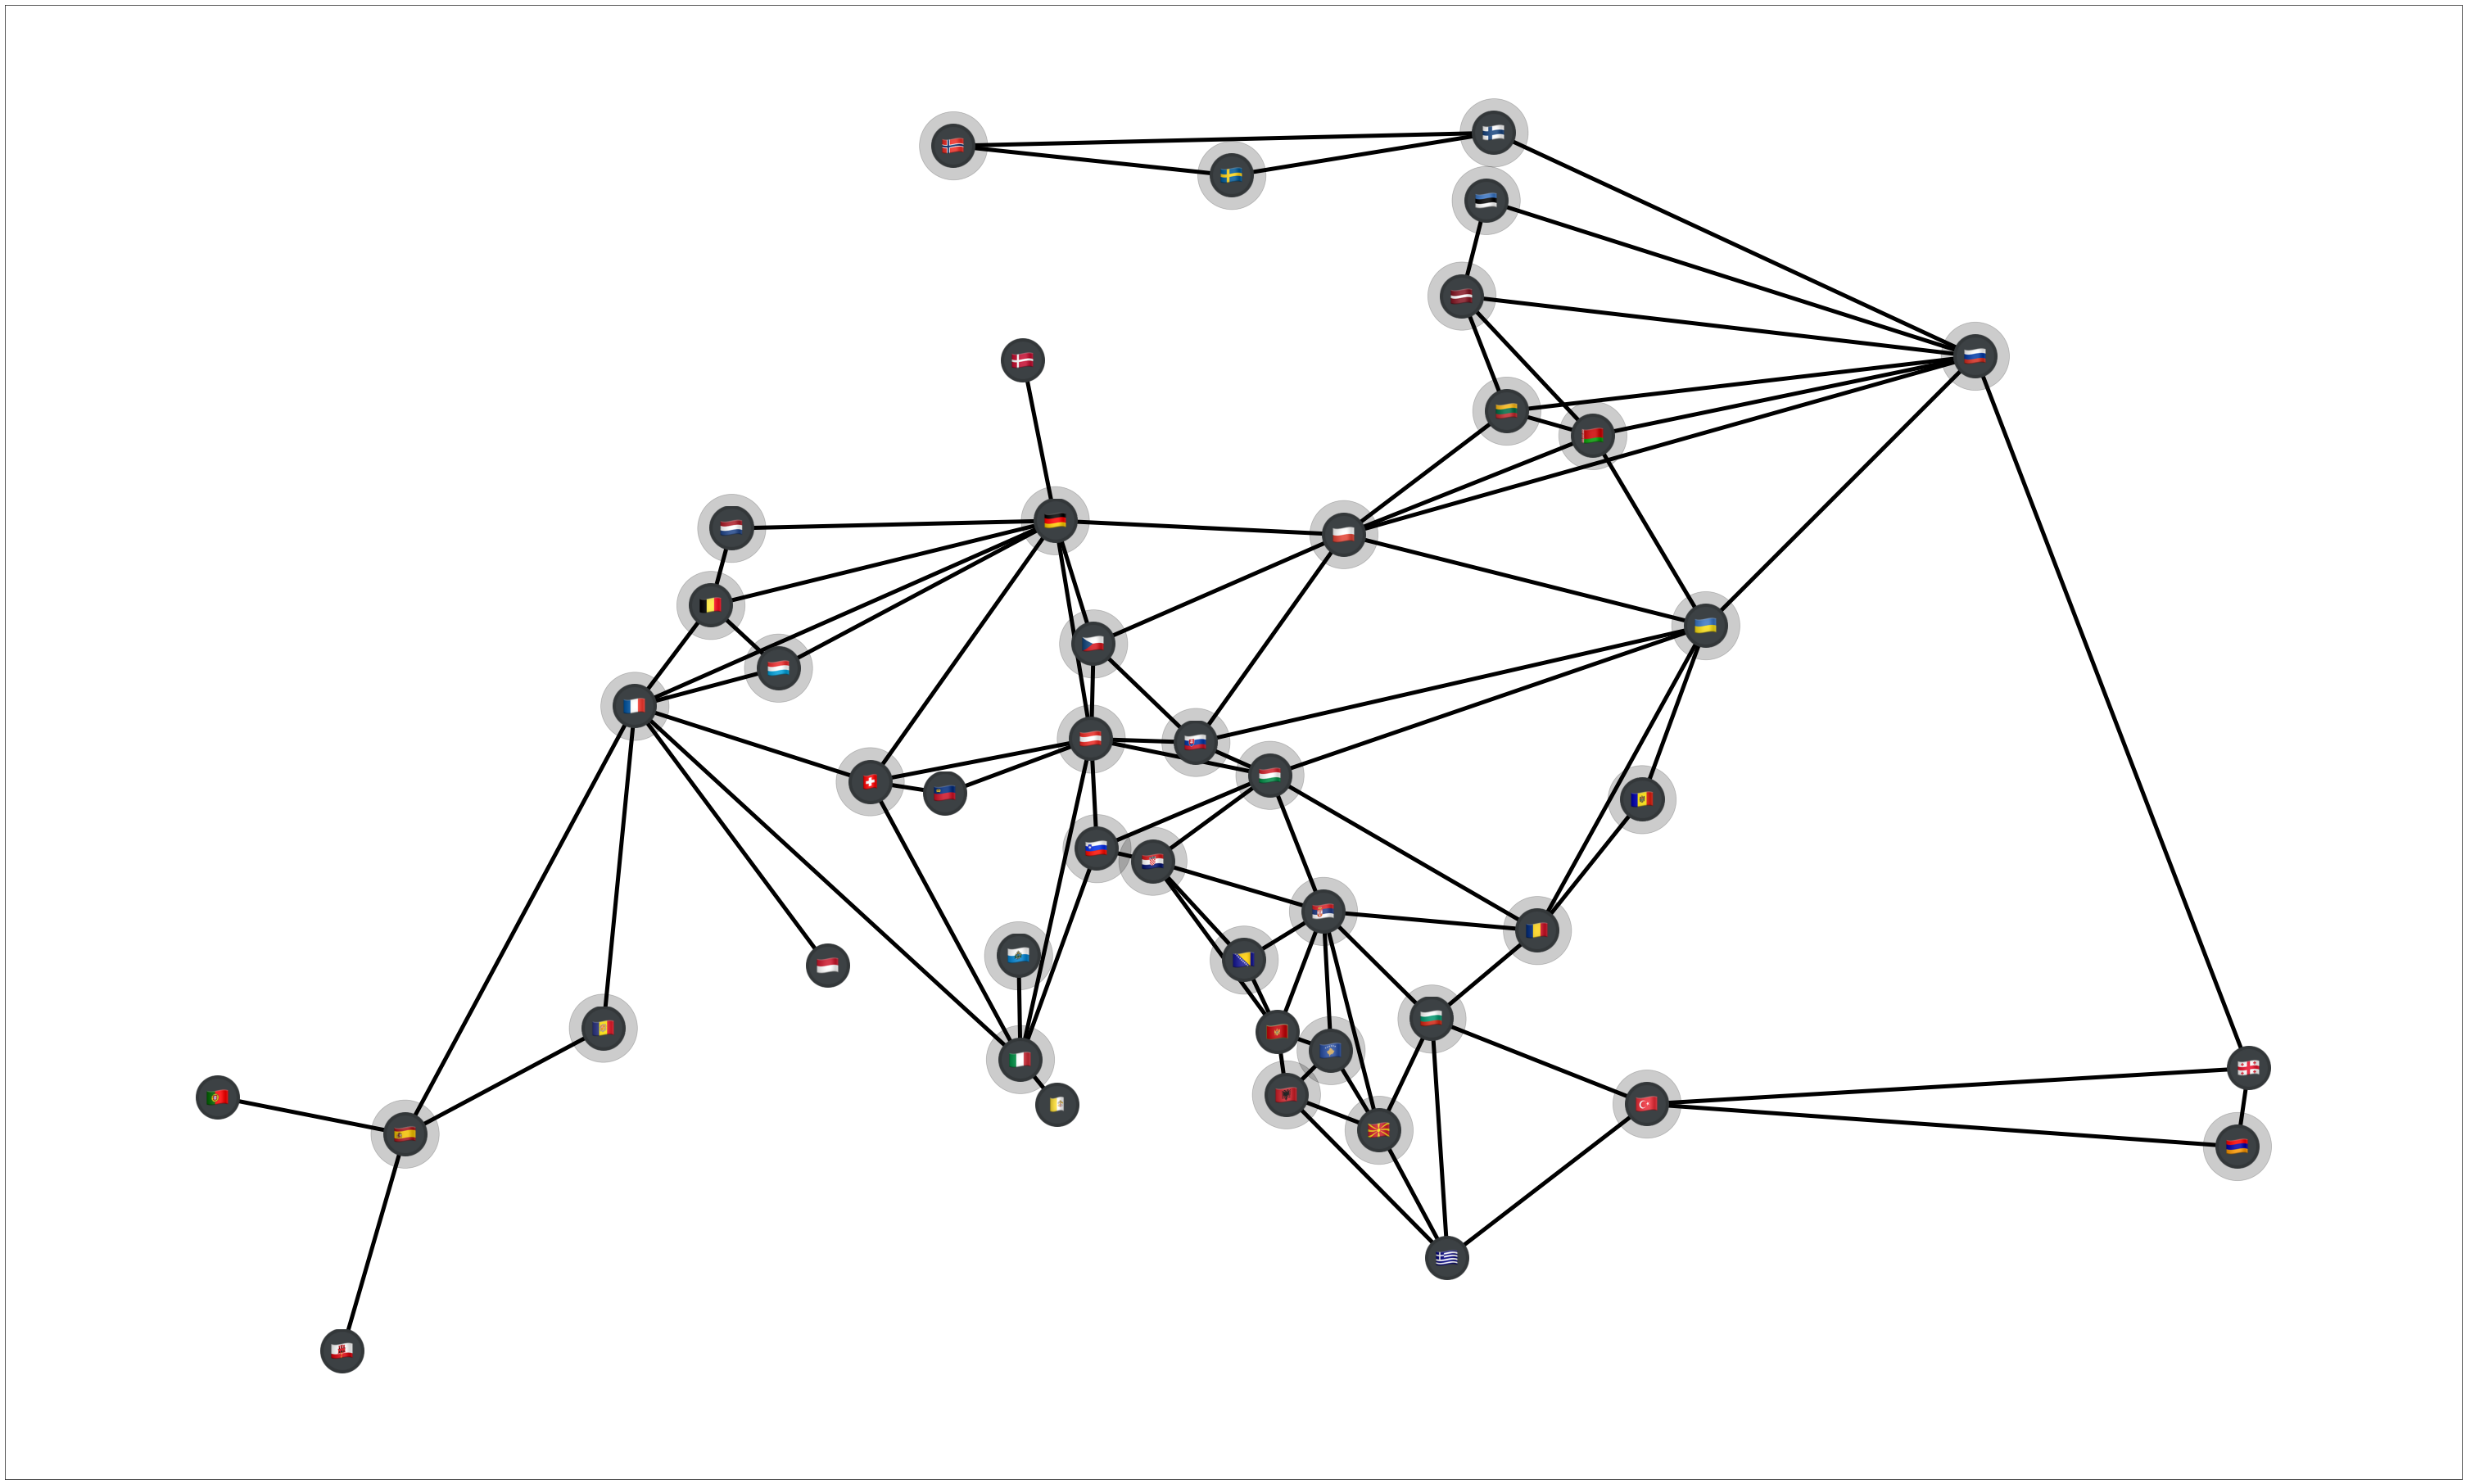

In [27]:
def renderMinVertCover(g: nx.Graph):
    global g_minvertexcover
    # Colors
    node_cmap = []
    nodelist = []
    for n in g.nodes:
        nodelist.append(n)
        if n in g_minvertexcover:
            node_cmap.append((0,0,0,0.2))
        else:
            node_cmap.append((0,0,0,0))
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = 10000, with_labels=False, width=6, nodelist=nodelist, node_color=node_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderMinVertCover(g)

### I - Minimum Edge Cover

In [28]:
g_minedgecover = nx.min_edge_cover(g)
g_minedgecoverstr = ""
for e in g_minedgecover:
    g_minedgecoverstr += f"({e[0]} <-> {e[1]}), "
# print(f"Min. Edge Cover: {g_minedgecoverstr}\nSize: {len(g_minedgecover)}")

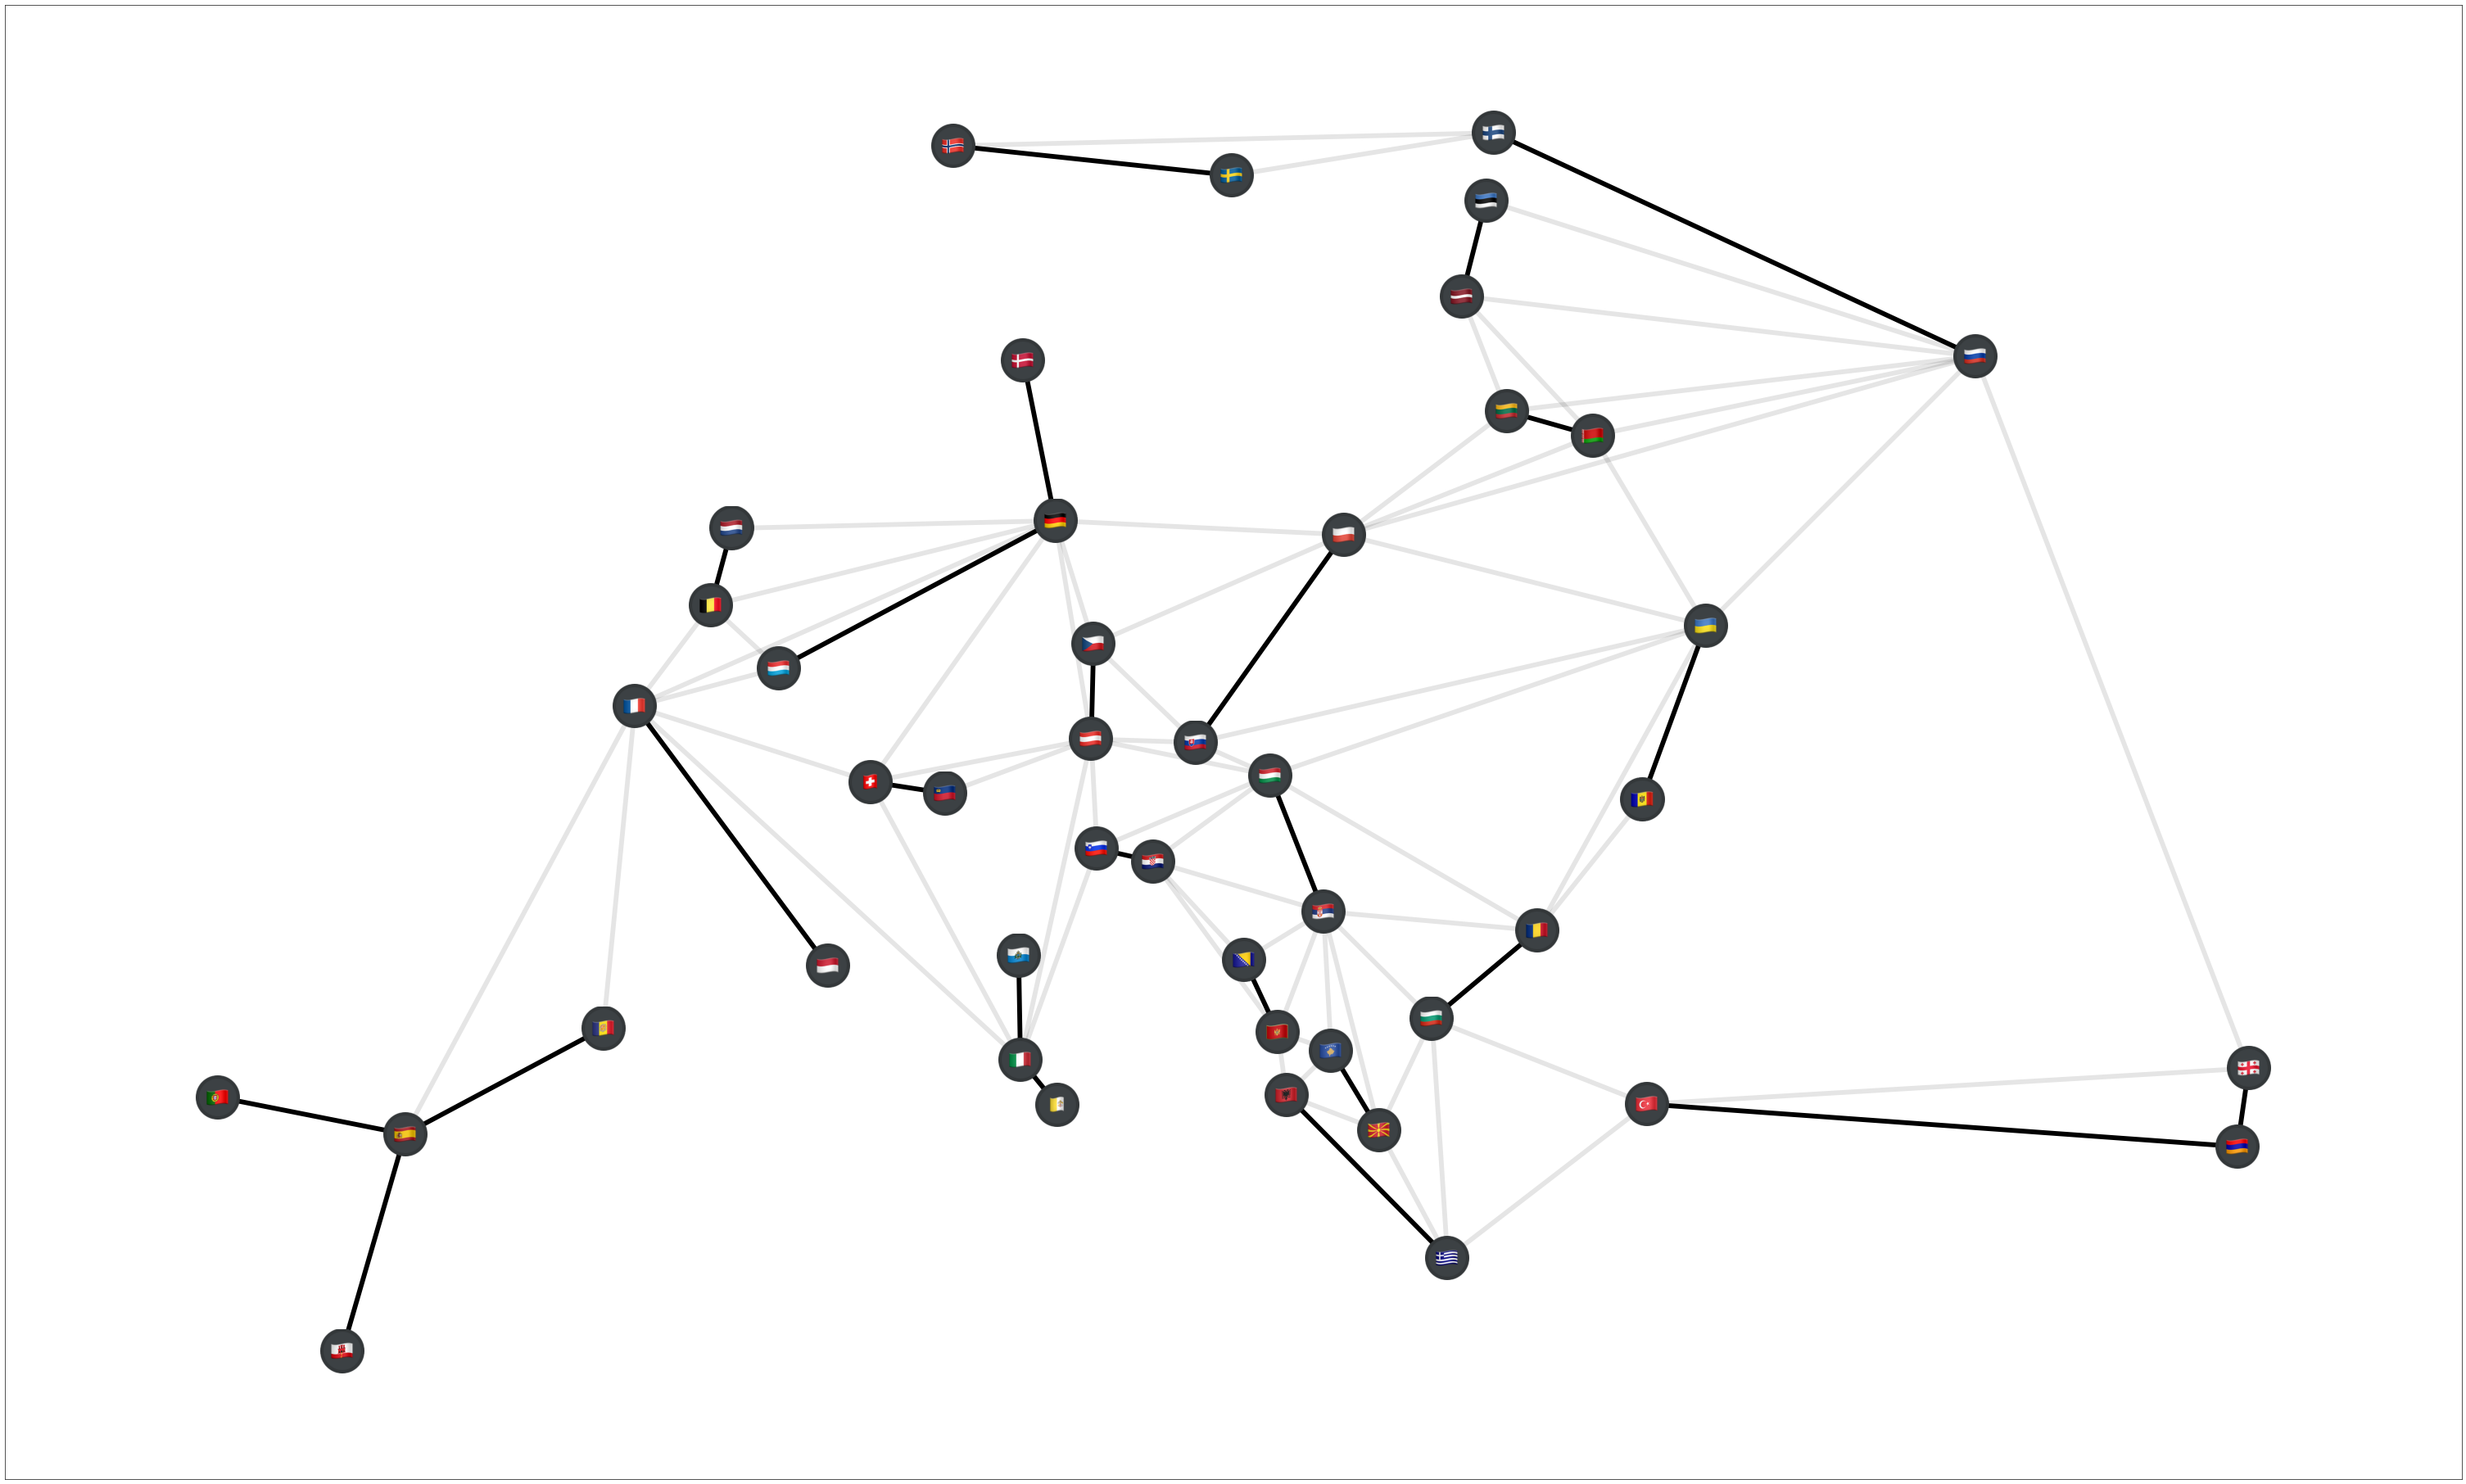

In [29]:
def renderMinEdgeCover(g: nx.Graph):
    global g_minedgecover
    # Colors
    edge_cmap = []
    edgelist = []
    for e in g.edges:
        edgelist.append(e)
        if (e in g_minedgecover) or ((e[1], e[0]) in g_minedgecover):
            edge_cmap.append((0,0,0,1))
        else:
            edge_cmap.append((0,0,0,0.1))
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=7, edgelist=edgelist, edge_color=edge_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderMinEdgeCover(g)

### J - Shortest Closed Walk (all vertices)

In [45]:
### Approx, since the amount of solutions is too big to compute

g_shortestvertwalk = nx.approximation.traveling_salesman_problem(g)
print("Shortest Closed Walk: ", end="")
print(*g_shortestvertwalk, sep=" -> ")
print(f"Size: {len(g_shortestvertwalk)}")

Shortest Closed Walk: Албания -> Македония -> Косово -> Черногория -> Босния -> Сербия -> Хорватия -> Венгрия -> Австрия -> Словения -> Австрия -> Словакия -> Австрия -> Швейцария -> Лихтенштейн -> Австрия -> Италия -> Ватикан -> Италия -> Сан Марино -> Италия -> Франция -> Испания -> Португалия -> Испания -> Гибралтар -> Испания -> Андорра -> Франция -> Монако -> Франция -> Бельгия -> Нидерланды -> Германия -> Дания -> Германия -> Люксембург -> Германия -> Чехия -> Польша -> Беларусь -> Литва -> Россия -> Финляндия -> Швеция -> Норвегия -> Финляндия -> Россия -> Эстония -> Латвия -> Беларусь -> Украина -> Молдова -> Румыния -> Болгария -> Турция -> Армения -> Грузия -> Турция -> Греция -> Албания
Size: 61


### K - Shortest Closed Walk (all edges)

In [47]:
import itertools

# Chinese postman problem: http://brooksandrew.github.io/simpleblog/articles/intro-to-graph-optimization-solving-cpp
def findShortestClosedWalk():
    global g
    oddv = [v for v, deg in g.degree() if deg % 2 != 0]
    oddvPairs = list(itertools.combinations(oddv, 2))

    dist = {}
    for pair in oddvPairs:
        dist[pair] = nx.dijkstra_path_length(g, pair[0], pair[1])
    
    g_compl = nx.Graph()
    for key, dst in dist.items():
        g_compl.add_edge(key[0], key[1], **{"distance": dst, "weight": -dst})
    
    odd_match = nx.algorithms.max_weight_matching(g_compl, True)
    
    g_mult = nx.MultiGraph(g.copy())

    for pair in odd_match:
        g_mult.add_edge(pair[0], pair[1], **{
            'distance': nx.dijkstra_path_length(g, pair[0], pair[1]), 'trail': 'augmented'})
    res = list(nx.eulerian_circuit(g_mult))
    return res

g_shortestedgewalk = findShortestClosedWalk()

print(f"Size: {len(g_shortestedgewalk)}")
print("Shortest Closed Edge Walk: ", end="")
for e in g_shortestedgewalk:
    print(f"{e[0]} -> ", end="")
print(g_shortestedgewalk[0][0])

Size: 102
Shortest Closed Edge Walk: Албания -> Черногория -> Сербия -> Македония -> Косово -> Черногория -> Босния -> Черногория -> Хорватия -> Сербия -> Румыния -> Украина -> Словакия -> Польша -> Украина -> Румыния -> Молдова -> Украина -> Россия -> Польша -> Литва -> Россия -> Грузия -> Турция -> Греция -> Македония -> Болгария -> Сербия -> Венгрия -> Словакия -> Швейцария -> Италия -> Ватикан -> Сан Марино -> Италия -> Словения -> Венгрия -> Хорватия -> Венгрия -> Украина -> Беларусь -> Польша -> Германия -> Швейцария -> Лихтенштейн -> Австрия -> Словения -> Хорватия -> Босния -> Сербия -> Косово -> Албания -> Греция -> Болгария -> Турция -> Армения -> Грузия -> Финляндия -> Норвегия -> Швеция -> Финляндия -> Россия -> Латвия -> Эстония -> Россия -> Беларусь -> Латвия -> Литва -> Беларусь -> Польша -> Чехия -> Словакия -> Австрия -> Италия -> Франция -> Германия -> Дания -> Германия -> Люксембург -> Монако -> Франция -> Люксембург -> Бельгия -> Германия -> Чехия -> Австрия -> Герм

### L - All Biconnected Components of Europe

1 : Португалия, Испания
2 : Гибралтар, Испания
3 : Франция, Испания, Андорра
4 : Норвегия, Швеция, Финляндия
5 : Россия, Финляндия
6 : Германия, Дания
7 : Франция, Монако
8 : Сан Марино, Италия
9 : Ватикан, Италия
10 : Германия, Италия, Польша, Чехия, Россия, Болгария, Албания, Грузия, Украина, Сербия, Турция, Швейцария, Румыния, Литва, Венгрия, Латвия, Беларусь, Хорватия, Греция, Армения, Босния, Косово, Словения, Франция, Черногория, Эстония, Лихтенштейн, Австрия, Бельгия, Люксембург, Нидерланды, Македония, Молдова, Словакия
11 : Великобритания, Ирландия


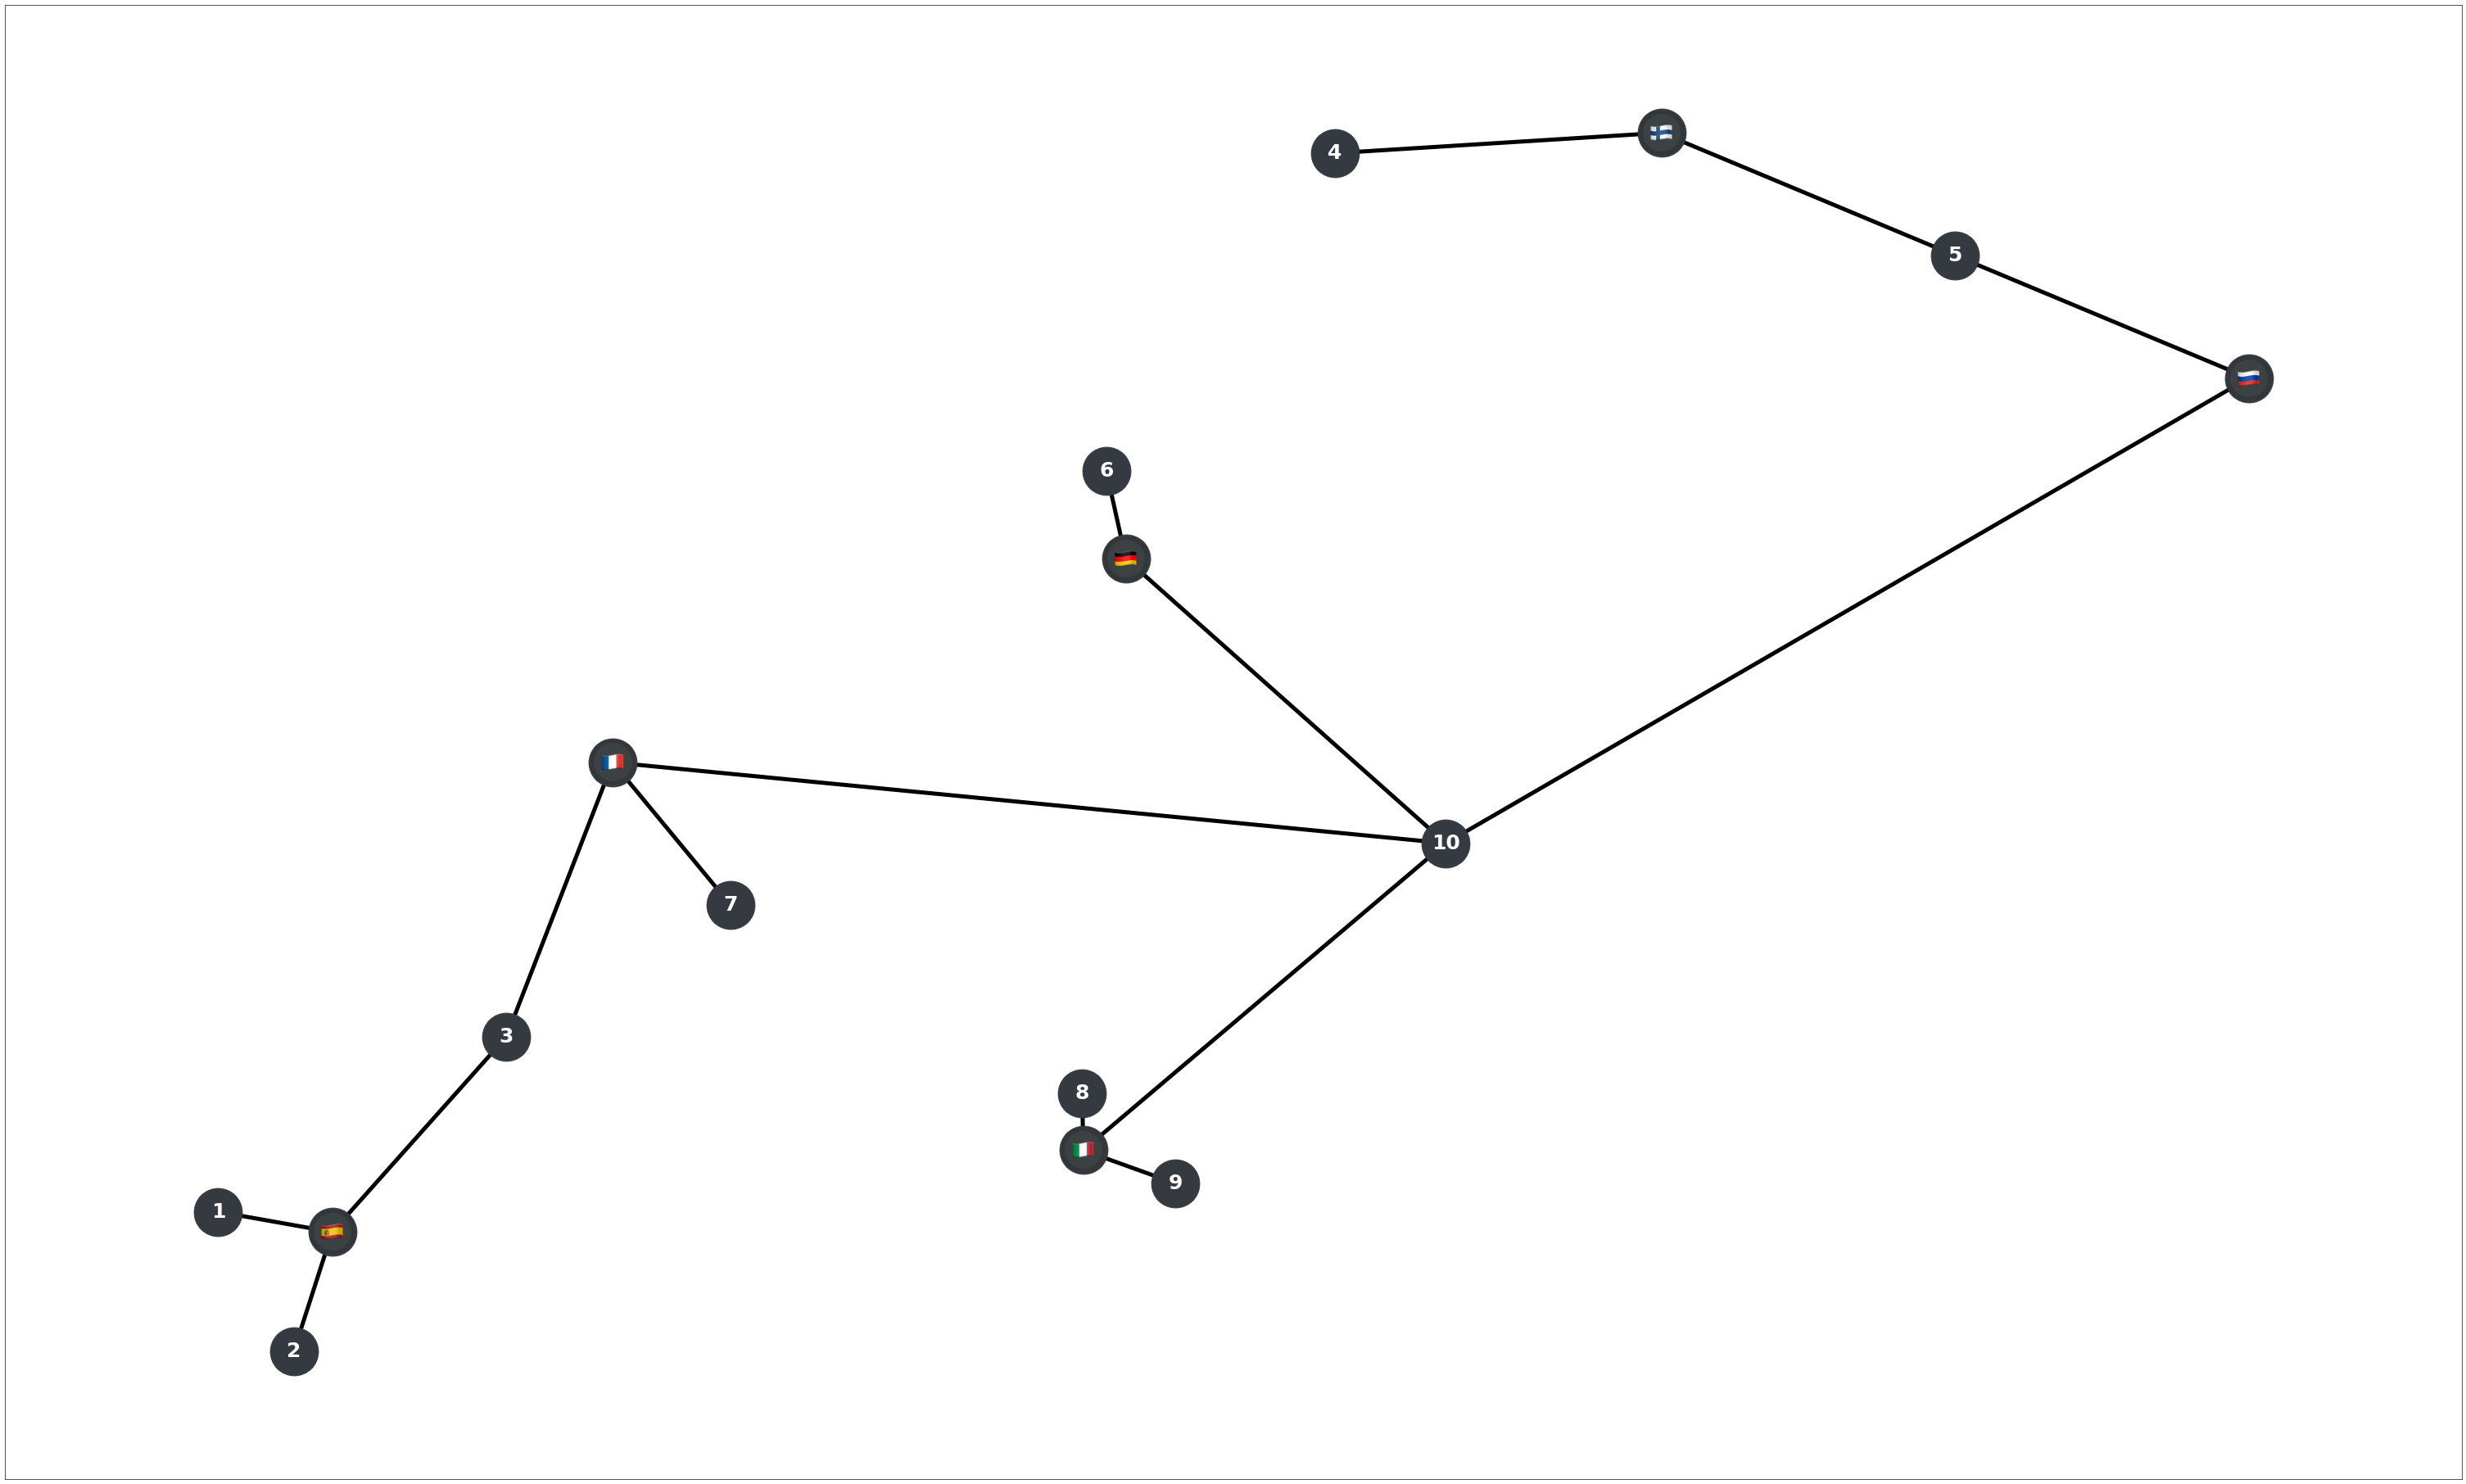

In [32]:
eu_bicomp = list(nx.biconnected_components(eu))

for i in range(len(eu_bicomp)):
    print(f"{i+1} : ", end="")
    print(*eu_bicomp[i], sep=", ")

bcut = nx.Graph()
for n in nx.articulation_points(eu):
    for c in range(len(eu_bicomp)):
        if n in eu_bicomp[c]: bcut.add_edge(n, str(c+1))

def renderEuBicon(g: nx.Graph):
    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    g_labels = {}
    for n in g.nodes():
        if n.isnumeric():
            g_labels[n] = n
        else:
            g_labels[n] = ""

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    for c in range(len(eu_bicomp)):
        comp = eu_bicomp[c]
        posLat = 0
        posLon = 0
        for country in comp:
            posLat += pos[country][0]
            posLon += pos[country][1]
        posLat /= len(comp)
        posLon /= len(comp)
        pos[str(c+1)] = [posLat, posLon]

    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005
    
    # Vatican is too close to rome
    pos["9"][0] += 0.02
    pos["9"][1] -= 0.02
    

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos=pos, node_size = 5000, with_labels=True, width=6, labels=g_labels, node_color="#343a40", font_color="#ffffff", font_size=30, font_weight="black")
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        if g_labels[n] == "":
            a.imshow(plt.imread("assets/flags/" + n + ".png"))
        a.axis("off")
    plt.show()
renderEuBicon(bcut)

### M - 2-Edge connected components of Europe

In [33]:
eu_twoedge = list(nx.k_edge_components(eu, 2))
for i in range(len(eu_twoedge)):
    compstr = ", ".join(eu_twoedge[i])
    print(f"{i+1} = {compstr}")

1 = Германия, Италия, Польша, Грузия, Россия, Болгария, Албания, Сербия, Украина, Чехия, Турция, Андорра, Литва, Румыния, Швейцария, Венгрия, Латвия, Беларусь, Хорватия, Греция, Армения, Босния, Косово, Словения, Франция, Черногория, Эстония, Лихтенштейн, Австрия, Бельгия, Люксембург, Нидерланды, Македония, Испания, Молдова, Словакия
2 = Дания
3 = Норвегия, Швеция, Финляндия
4 = Монако
5 = Португалия
6 = Сан Марино
7 = Гибралтар
8 = Ватикан
9 = Великобритания
10 = Ирландия
11 = Исландия
12 = Гренландия
13 = Мальта


### N - SQPR tree of the largest biconnect component of G
Steps to repro are as follows:
1. Run the code bellow and copy the result
2. Go to [sagecell](https://sagecell.sagemath.org)
3. Run the code bellow, where `{}` shall be replaced by the output you copied
```
gdl = {}
g = Graph(gdl)
g = g.to_undirected()
sqpr = g.spqr_tree()
plot(sqpr)
```

In [34]:
g_bicomp = nx.biconnected_components(g)
g_largestbicomp = ""
for c in g_bicomp:
    if len(c) > len(g_largestbicomp): g_largestbicomp = c
print(nx.to_dict_of_lists(g, nodelist=g_largestbicomp))

{'Германия': ['Австрия', 'Бельгия', 'Чехия', 'Франция', 'Нидерланды', 'Люксембург', 'Швейцария', 'Польша'], 'Италия': ['Австрия', 'Франция', 'Швейцария', 'Словения'], 'Польша': ['Беларусь', 'Чехия', 'Германия', 'Литва', 'Россия', 'Украина', 'Словакия'], 'Чехия': ['Австрия', 'Германия', 'Польша', 'Словакия'], 'Россия': ['Беларусь', 'Эстония', 'Грузия', 'Латвия', 'Литва', 'Польша', 'Украина'], 'Болгария': ['Румыния', 'Турция', 'Греция', 'Македония', 'Сербия'], 'Албания': ['Македония', 'Косово', 'Черногория', 'Греция'], 'Грузия': ['Армения', 'Россия', 'Турция'], 'Украина': ['Беларусь', 'Венгрия', 'Молдова', 'Польша', 'Румыния', 'Россия', 'Словакия'], 'Сербия': ['Босния', 'Болгария', 'Хорватия', 'Венгрия', 'Косово', 'Черногория', 'Македония', 'Румыния'], 'Турция': ['Армения', 'Болгария', 'Грузия', 'Греция'], 'Швейцария': ['Австрия', 'Франция', 'Германия', 'Италия', 'Лихтенштейн'], 'Румыния': ['Болгария', 'Венгрия', 'Молдова', 'Украина', 'Сербия'], 'Литва': ['Беларусь', 'Латвия', 'Россия', 

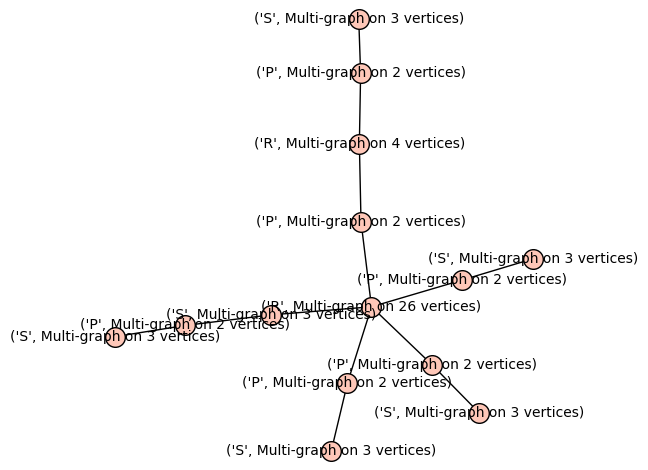

In [37]:
# Bellow is the result I got on my run
from IPython.display import Image
Image(filename="assets/n.png")

### O - Minimum Spanning Tree based on distance between capitals

In [39]:
# Creating EUw and Gw
euw = nx.Graph()
borders = open("data/borders.txt", "r").read().split("\n")

for country in borders:
    line = country.split(",")
    if (len(line) == 0): continue
    euw.add_node(line[0], image = "assets/flags/" + line[0] + ".png")
# Add edges
for country in borders:
    line = country.split(",")
    if (len(line) == 0): continue
    for i in range(1, len(line)):
        euw.add_edge(line[0], line[i], weight = dist(line[0], line[1]))

gw = euw.subgraph(max(nx.connected_components(euw)))
t = nx.minimum_spanning_tree(gw)
t_str = ""
for e in list(t.edges):
    t_str += f"({e[0]} <-> {e[1]}), "
print(f"MST = {t_str}")

MST = (Албания <-> Косово), (Андорра <-> Испания), (Армения <-> Турция), (Австрия <-> Швейцария), (Австрия <-> Лихтенштейн), (Австрия <-> Чехия), (Австрия <-> Словакия), (Австрия <-> Словения), (Беларусь <-> Литва), (Беларусь <-> Латвия), (Беларусь <-> Украина), (Бельгия <-> Люксембург), (Бельгия <-> Нидерланды), (Босния <-> Хорватия), (Босния <-> Сербия), (Болгария <-> Сербия), (Болгария <-> Турция), (Дания <-> Германия), (Эстония <-> Латвия), (Финляндия <-> Швеция), (Финляндия <-> Россия), (Франция <-> Швейцария), (Франция <-> Люксембург), (Франция <-> Испания), (Франция <-> Монако), (Грузия <-> Турция), (Германия <-> Швейцария), (Греция <-> Македония), (Венгрия <-> Словакия), (Венгрия <-> Сербия), (Венгрия <-> Украина), (Италия <-> Ватикан), (Италия <-> Швейцария), (Италия <-> Сан Марино), (Косово <-> Сербия), (Молдова <-> Румыния), (Черногория <-> Сербия), (Норвегия <-> Швеция), (Польша <-> Словакия), (Португалия <-> Испания), (Македония <-> Сербия), (Румыния <-> Сербия), (Россия <

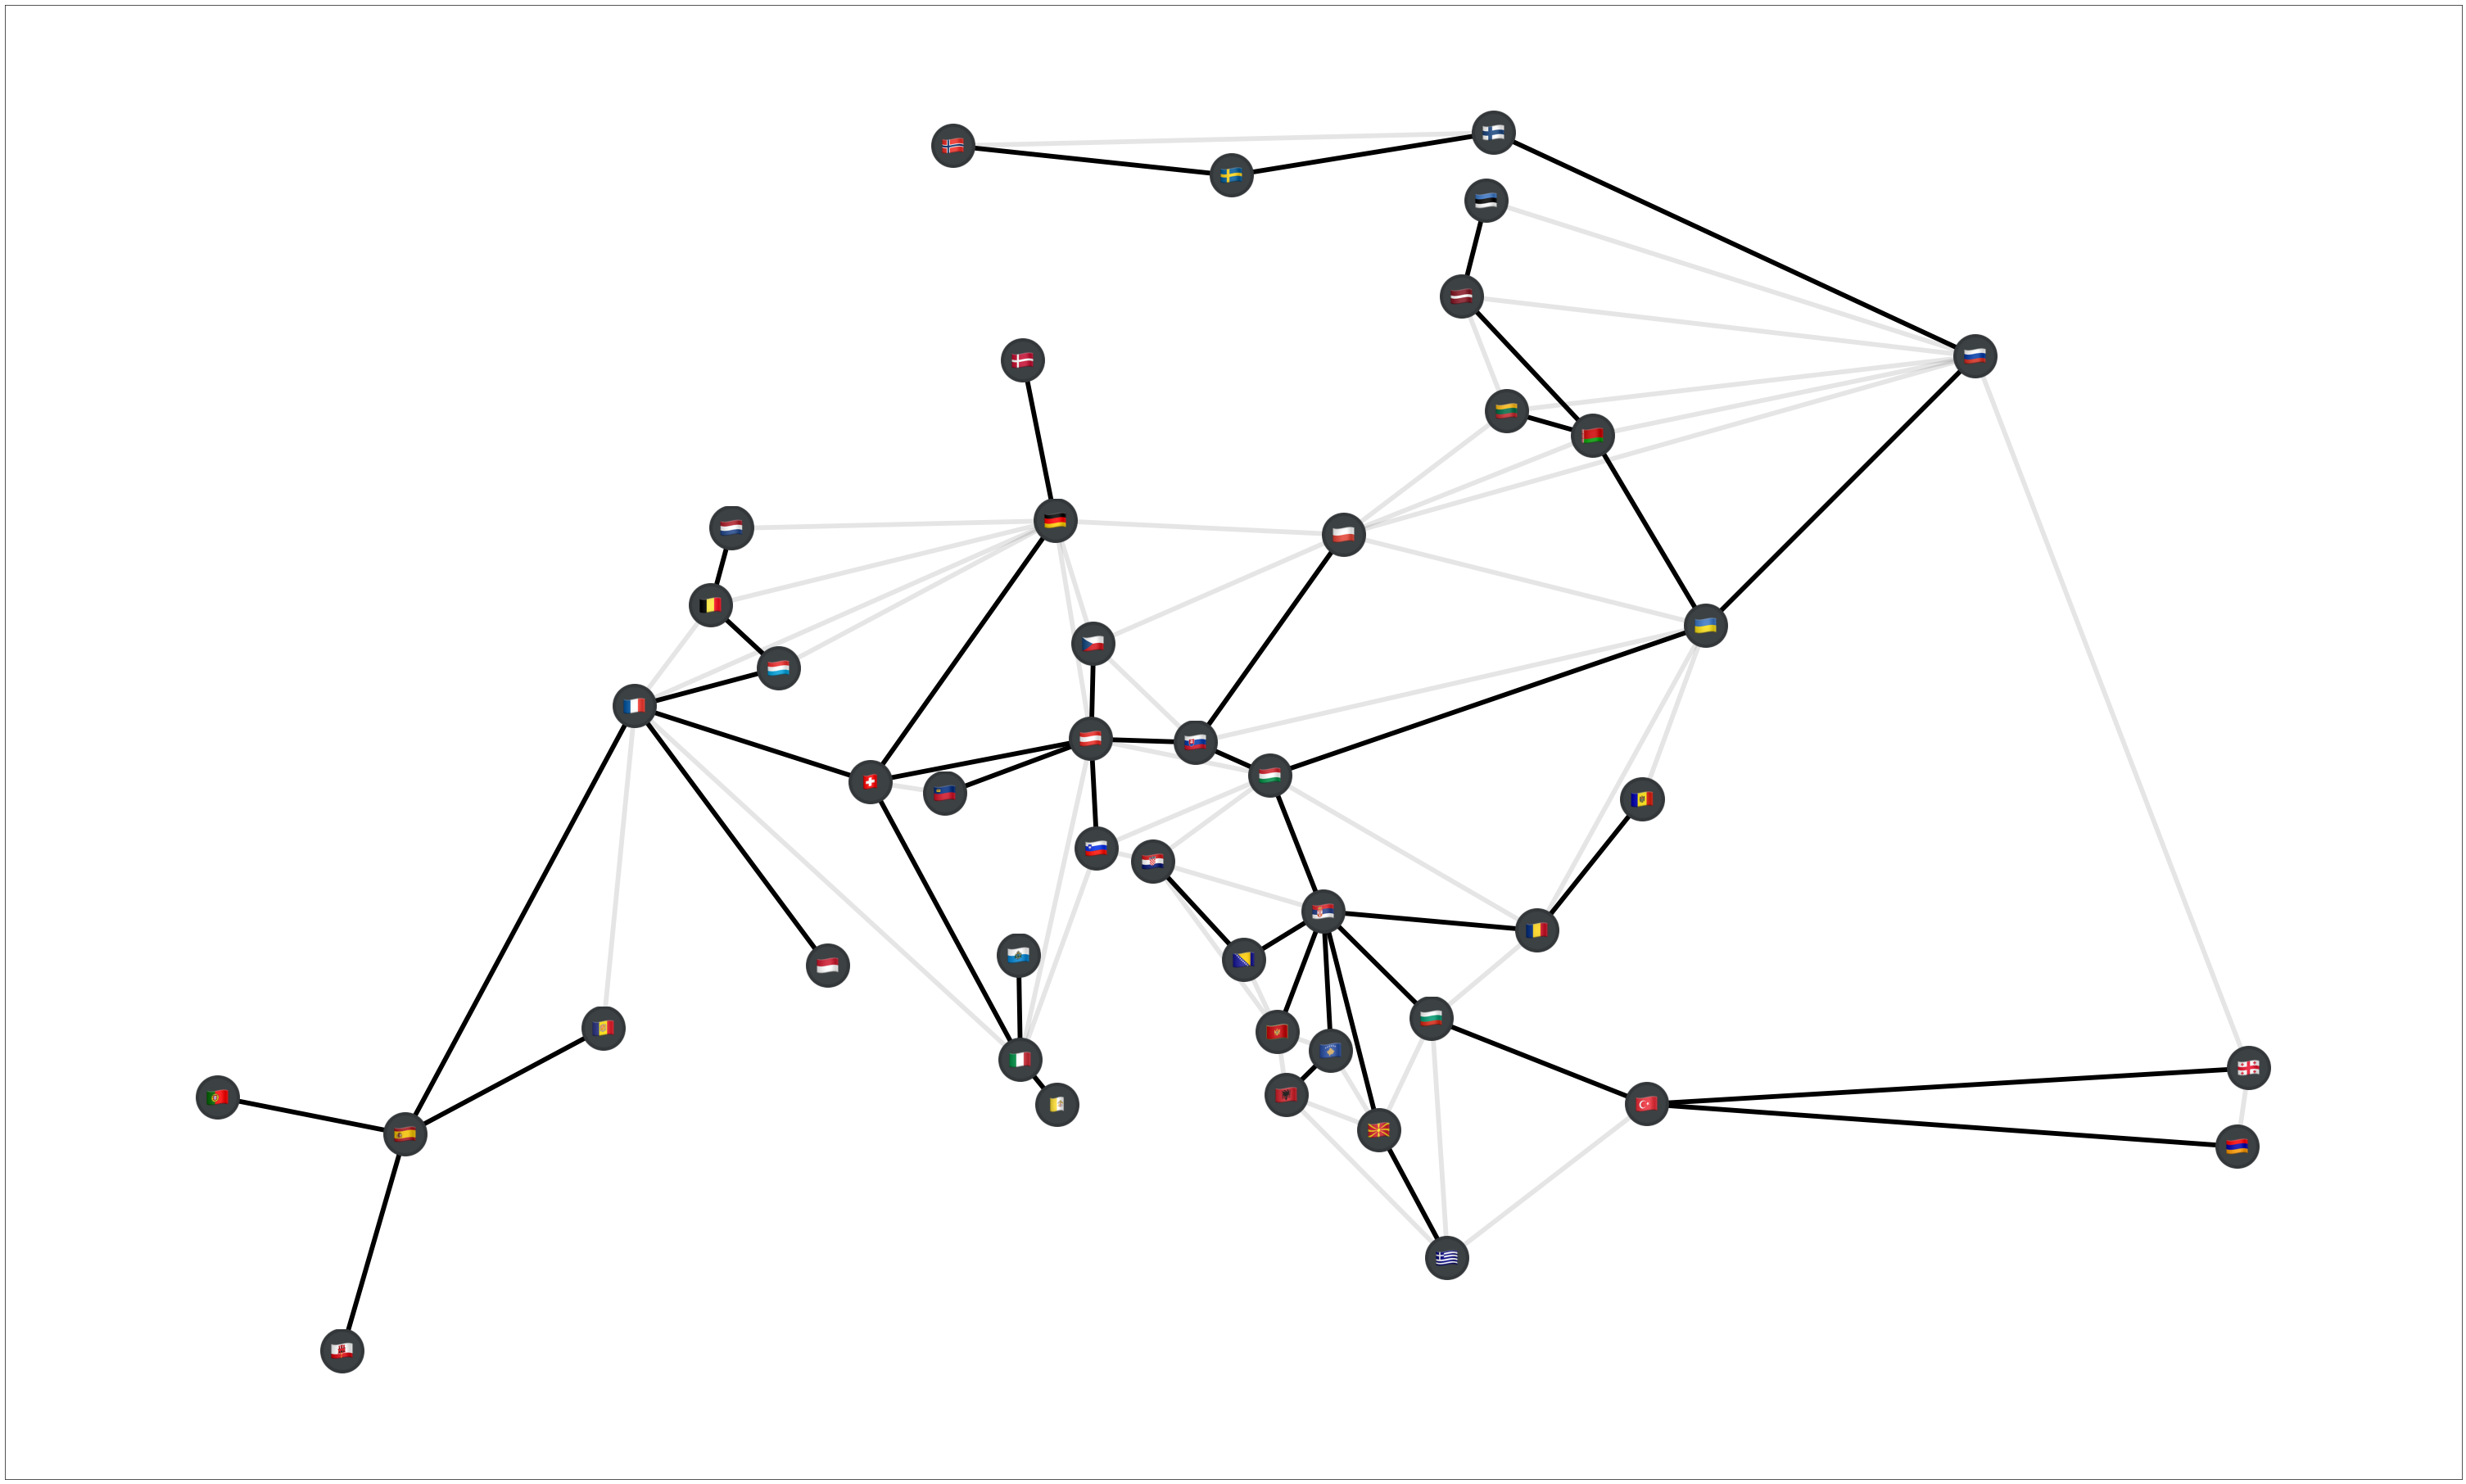

In [40]:
def renderMST(g: nx.Graph):
    global t
    # Colors
    edge_cmap = []
    edgelist = []
    for e in g.edges:
        edgelist.append(e)
        if (e in t.edges) or ((e[1], e[0]) in t.edges):
            edge_cmap.append((0,0,0,1))
        else:
            edge_cmap.append((0,0,0,0.1))
        

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    nx.draw_networkx(g, pos = pos, node_size = None, with_labels=False, width=7, edgelist=edgelist, edge_color=edge_cmap)
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderMST(gw)

### P - Centroid of T

In [41]:
t_allpathlens = list(nx.all_pairs_dijkstra_path_length(t))
t_eccs = {}
for country, weights in t_allpathlens:
    t_eccs[country] = 0
    for key in weights.keys():
        t_eccs[country] = max(t_eccs[country], int(weights[key]))
t_centroid = []
t_centroid_w = 100000000000000000000
for key in t_eccs.keys():
    if t_centroid_w > t_eccs[key]:
        t_centroid = [key]
        t_centroid_w = t_eccs[key]
    elif t_centroid_w == t_eccs[key]:
        t_centroid.append(key)
print(f"Centroid: ", end="")
print(*t_centroid, sep=",")
print(f"Weight: {t_centroid_w}")

Centroid: Украина
Weight: 2323613


### Q - Prüfer Code of T

In [42]:
t_labels = {}
t_nodes = list(t.nodes())
t_nodes.sort()
for i in range(len(t_nodes)):
    t_labels[t_nodes[i]] = i
    print((i+1), t_nodes[i], sep="\t")
t_labeled = nx.relabel_nodes(t, t_labels)
t_prufer = nx.to_prufer_sequence(t_labeled)
t_prufer_str = ",".join(str(v+1) for v in t_prufer)
print(t_prufer_str)

1	Австрия
2	Албания
3	Андорра
4	Армения
5	Беларусь
6	Бельгия
7	Болгария
8	Босния
9	Ватикан
10	Венгрия
11	Германия
12	Гибралтар
13	Греция
14	Грузия
15	Дания
16	Испания
17	Италия
18	Косово
19	Латвия
20	Литва
21	Лихтенштейн
22	Люксембург
23	Македония
24	Молдова
25	Монако
26	Нидерланды
27	Норвегия
28	Польша
29	Португалия
30	Россия
31	Румыния
32	Сан Марино
33	Сербия
34	Словакия
35	Словения
36	Турция
37	Украина
38	Финляндия
39	Франция
40	Хорватия
41	Черногория
42	Чехия
43	Швейцария
44	Швеция
45	Эстония
18,16,36,17,16,23,36,11,43,33,5,1,33,31,39,6,22,39,44,34,16,39,33,17,43,1,7,33,43,8,33,33,10,1,1,34,10,37,38,30,37,5,19


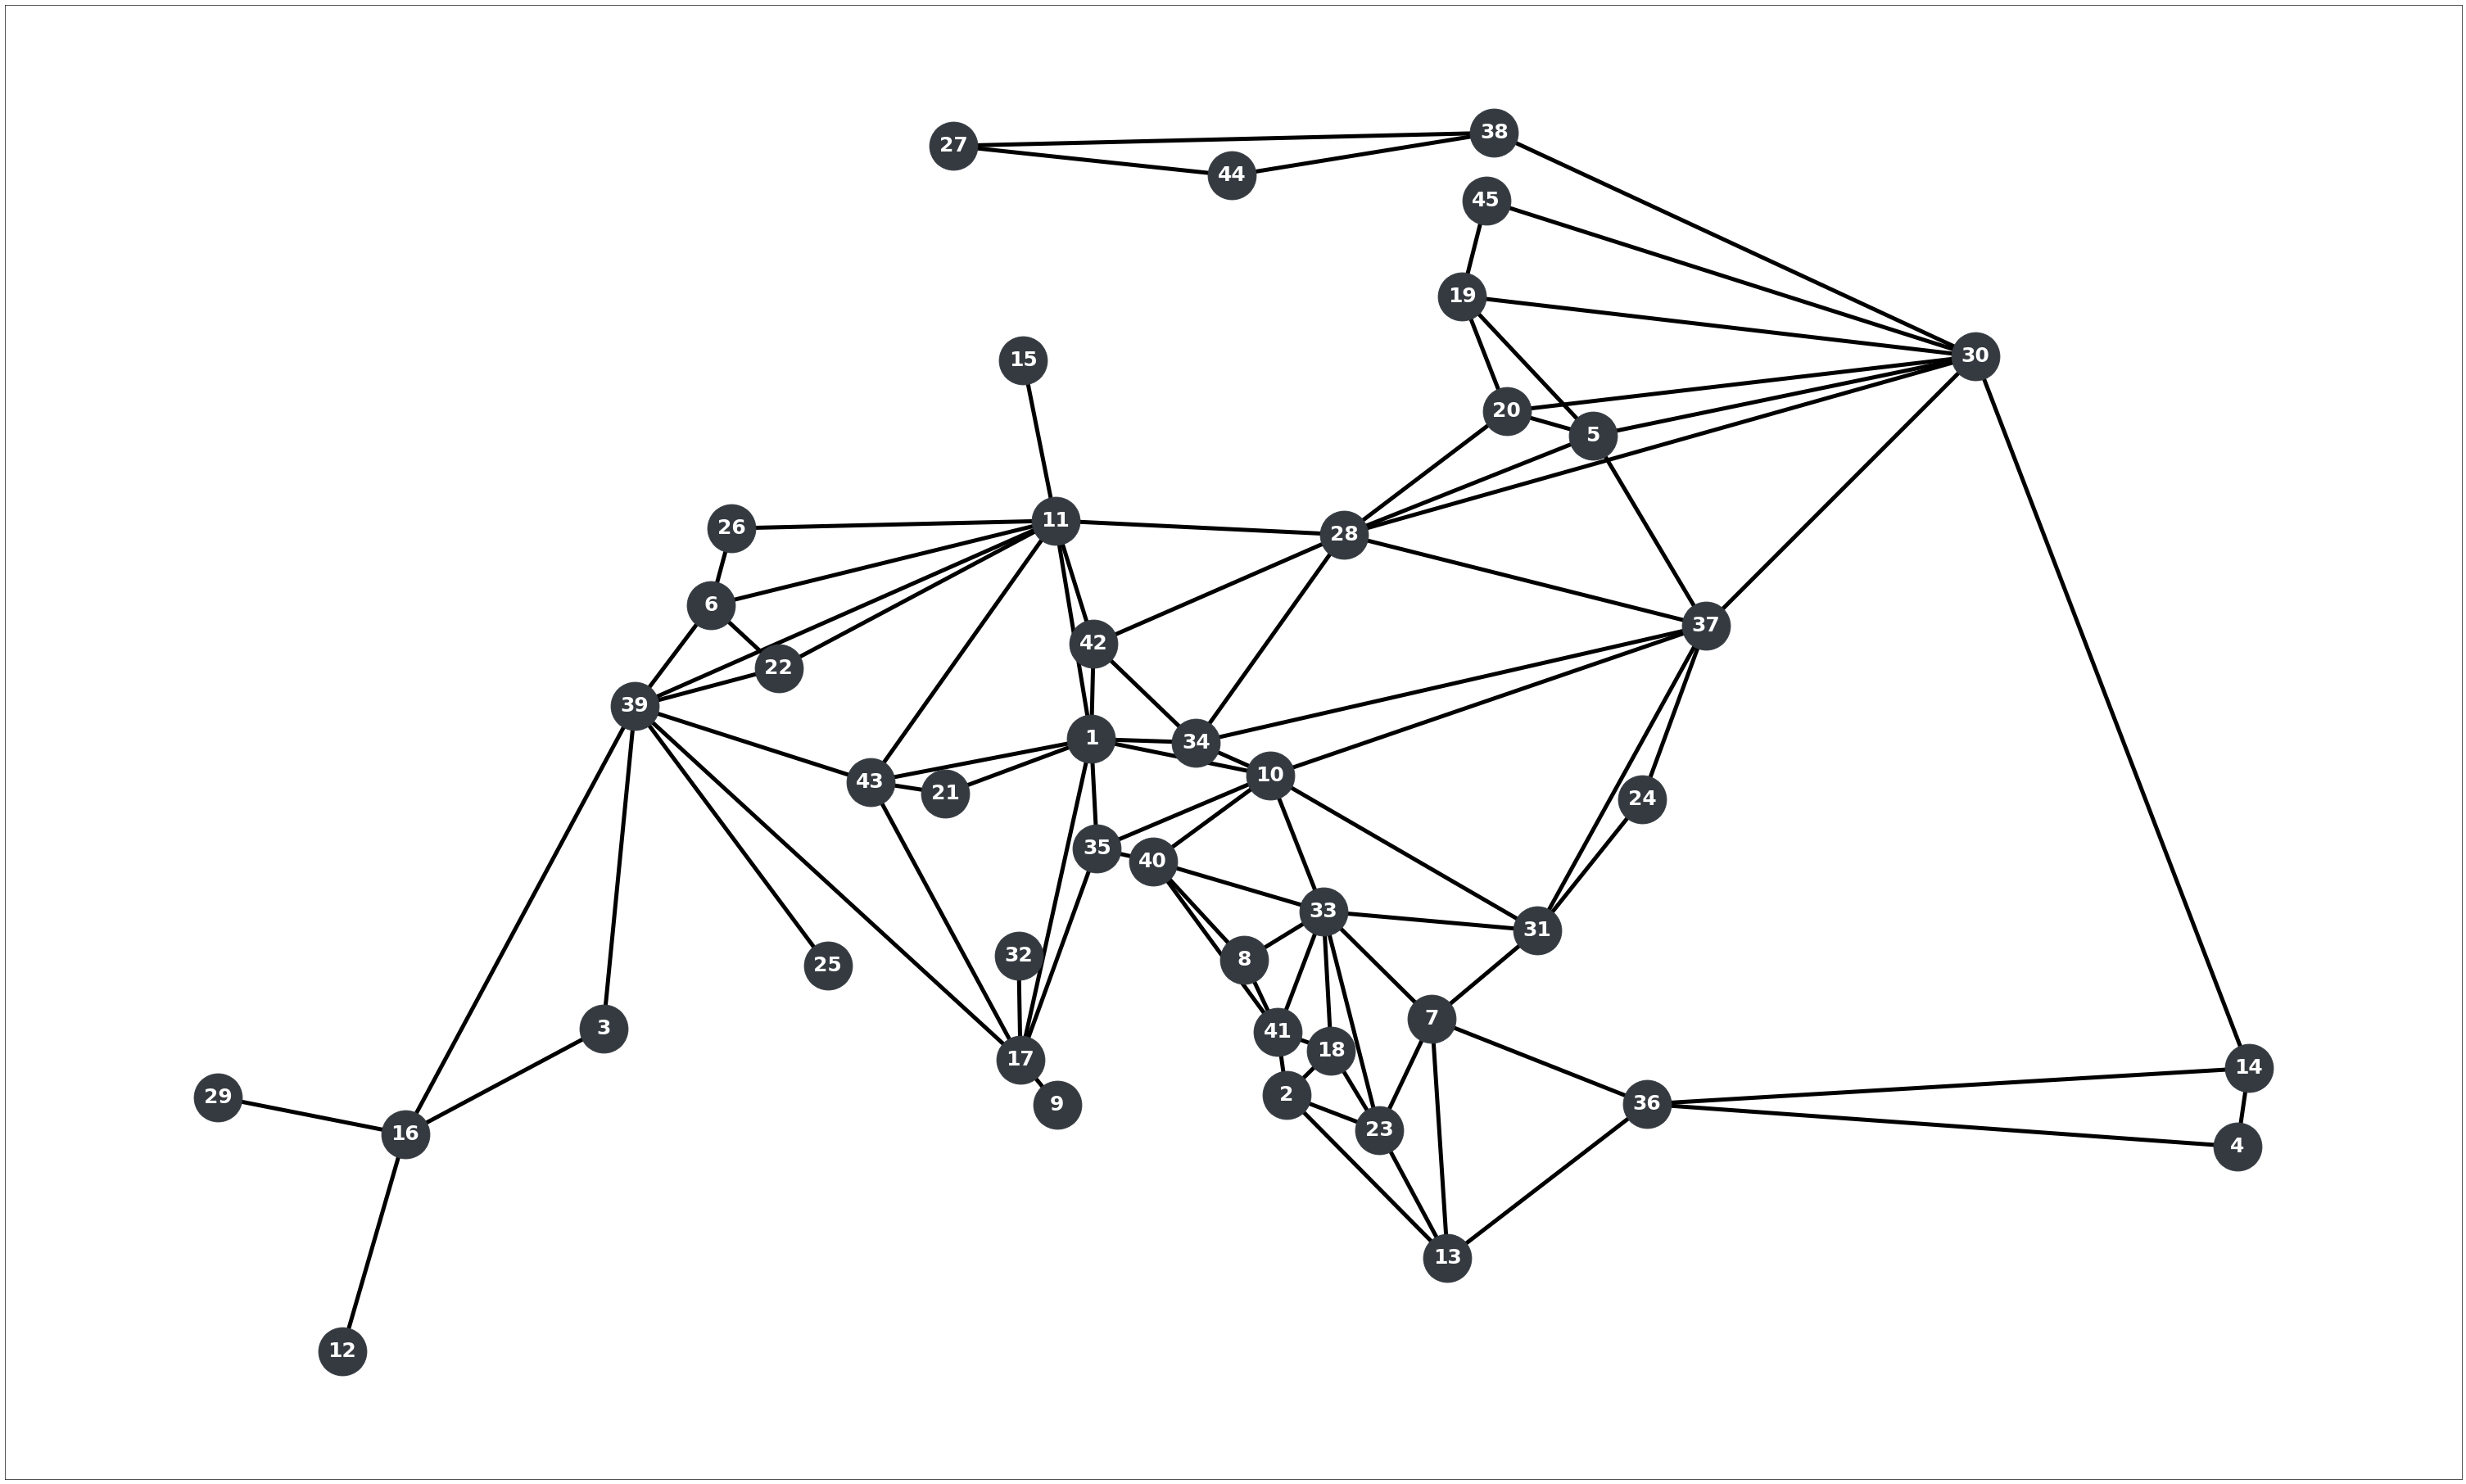

In [43]:
def renderPruferIndexes(g: nx.Graph):

    # Settings
    minLat = 35.0
    maxLat = 65.0
    minLon = -55.0
    maxLon = 45.0

    difLat = maxLat - minLat
    difLon = maxLon - minLon
    # plt.figure(figsize=(difLat, difLon), dpi = 60)
    pos = {}
    for key in capitals.keys():
        pos[key] = [(capitals[key][1] - minLon)/difLon, (capitals[key][0] - minLat)/difLat]
    
    # Manual overwrites
    pos["Македония"][1] -= 0.05
    pos["Македония"][0] += 0.005
    pos["Эстония"][1] -= 0.02
    pos["Австрия"][0] -= 0.02
    pos["Лихтенштейн"][0] += 0.01
    pos["Ватикан"][0] += 0.01
    pos["Ватикан"][1] -= 0.03
    pos["Беларусь"][1] += 0.01
    pos["Косово"][1] -= 0.02
    pos["Косово"][0] -= 0.005

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(difLon, difLat), dpi = 60)
    fig.add_axes([0.5,1,0.5,1])
    ax = fig.axes[0]
    icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.03
    icon_center = icon_size / 2.0
    tr_figure = ax.transData.transform
    tr_axes = fig.transFigure.inverted().transform

    for key in t_labels.keys():
        t_labels[key] += 1

    nx.draw_networkx(g, pos = pos, node_size = 5000, with_labels=True, labels=t_labels, width=6, node_color="#343a40", font_color="#ffffff", font_size=30, font_weight="black")
    for n in g.nodes:
        xf, yf = tr_figure(pos[n])
        xa, ya = tr_axes((xf, yf))
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        # a.imshow(plt.imread(g.nodes[n]["image"]))
        a.axis("off")
    plt.show()
renderPruferIndexes(g)